In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


In [3]:
df = pd.read_excel('Turbidity.xlsx')

# Set the index
df.set_index('Date', inplace=True) 
df = df.asfreq('h')  # Set frequency to hourly

df.interpolate(method='linear', inplace=True)  # Interpolate missing values

In [4]:
df.index

DatetimeIndex(['2020-12-31 15:00:00', '2020-12-31 16:00:00',
               '2020-12-31 17:00:00', '2020-12-31 18:00:00',
               '2020-12-31 19:00:00', '2020-12-31 20:00:00',
               '2020-12-31 21:00:00', '2020-12-31 22:00:00',
               '2020-12-31 23:00:00', '2021-01-01 00:00:00',
               ...
               '2023-12-30 00:00:00', '2023-12-30 01:00:00',
               '2023-12-30 02:00:00', '2023-12-30 03:00:00',
               '2023-12-30 04:00:00', '2023-12-30 05:00:00',
               '2023-12-30 06:00:00', '2023-12-30 07:00:00',
               '2023-12-30 08:00:00', '2023-12-30 09:00:00'],
              dtype='datetime64[ns]', name='Date', length=26251, freq='h')

In [5]:
# Check the shape of the dataset
df.shape 

(26251, 2)

In [6]:
df.columns

Index(['FLT GEM Turb influent oneven', 'FLT GEM Turb influent even'], dtype='object')

In [7]:
df

FLT GEM Turb influent oneven  FLT GEM Turb influent even
Date                                                                         
2020-12-31 15:00:00                      0.430411                    0.751607
2020-12-31 16:00:00                      0.522836                    0.486650
2020-12-31 17:00:00                      0.512069                    0.452956
2020-12-31 18:00:00                      0.450545                    0.422725
2020-12-31 19:00:00                      0.405494                    0.410669
...                                           ...                         ...
2023-12-30 05:00:00                      0.455236                    0.431437
2023-12-30 06:00:00                      0.398240                    0.424986
2023-12-30 07:00:00                      0.413984                    0.424021
2023-12-30 08:00:00                      0.435343                    0.440010
2023-12-30 09:00:00                      0.379473                    0.460702

[26251 rows x 2 columns]

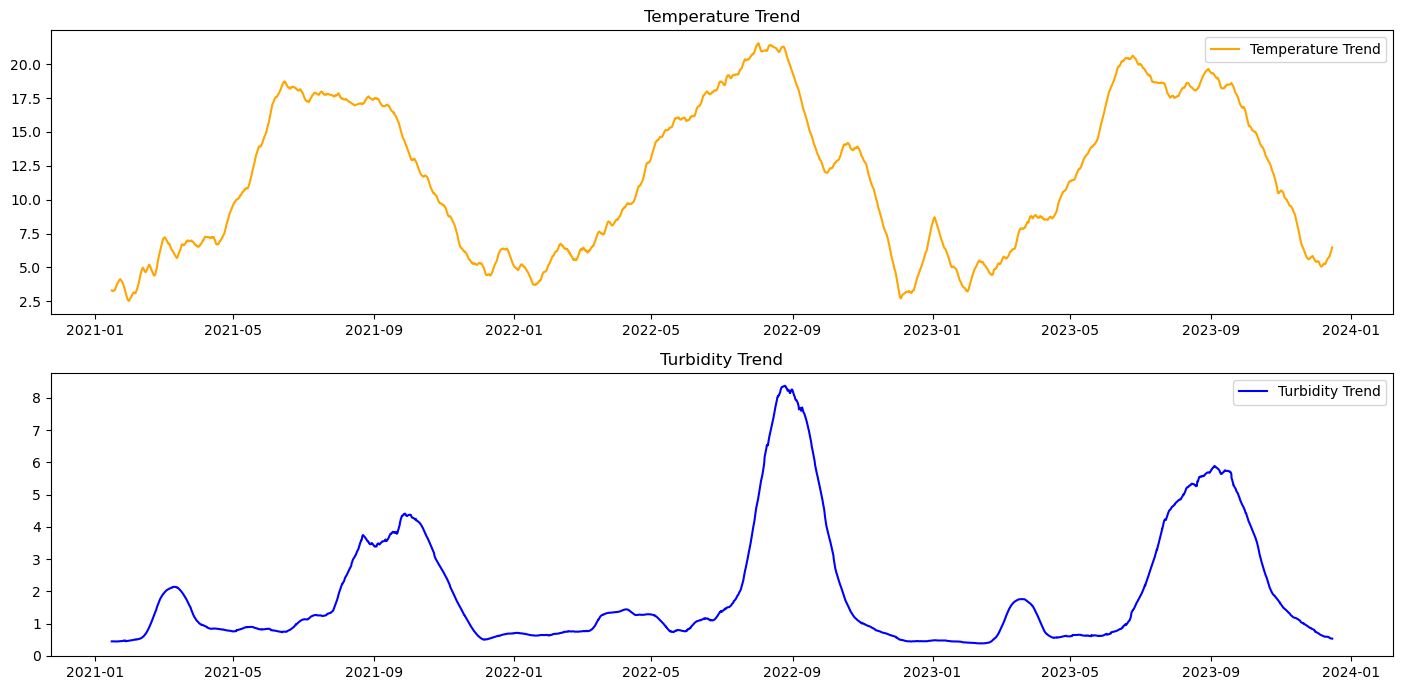

<Figure size 1400x1000 with 0 Axes>

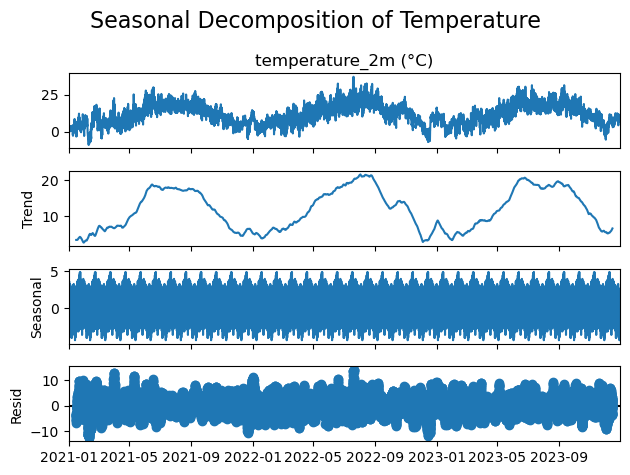

<Figure size 1400x1000 with 0 Axes>

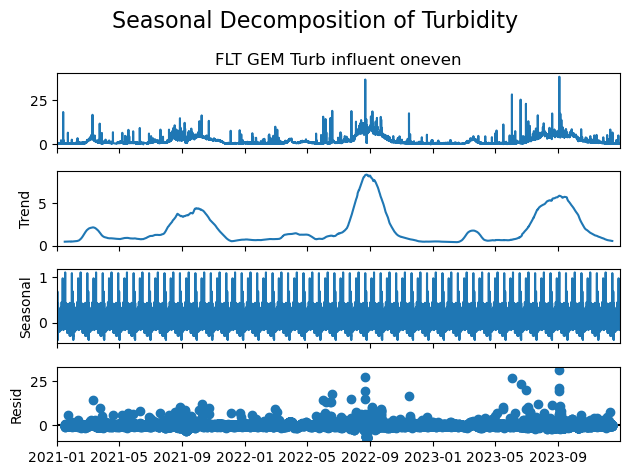

In [8]:
weather = pd.read_excel('weather.xlsx')
# Set the index for weather data
weather.set_index('Date', inplace=True)
# decompose temporature data
result = seasonal_decompose(weather['temperature_2m (°C)'], model='additive', period=30*24)
# decompose turbidity data
result_turbidity = seasonal_decompose(df['FLT GEM Turb influent oneven'], model='additive', period=30*24)
# plot trends between turbidity and temperature
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(result.trend, label='Temperature Trend', color='orange')
plt.title('Temperature Trend')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(result_turbidity.trend, label='Turbidity Trend', color='blue')
plt.title('Turbidity Trend')
plt.legend()
plt.tight_layout()
plt.show()
# Plotting the seasonal decomposition of temperature
plt.figure(figsize=(14, 10))
result.plot()
plt.suptitle('Seasonal Decomposition of Temperature', fontsize=16)
plt.tight_layout()
plt.show()
# Plotting the seasonal decomposition of turbidity
plt.figure(figsize=(14, 10))
result_turbidity.plot()
plt.suptitle('Seasonal Decomposition of Turbidity', fontsize=16)
plt.tight_layout()
plt.show()

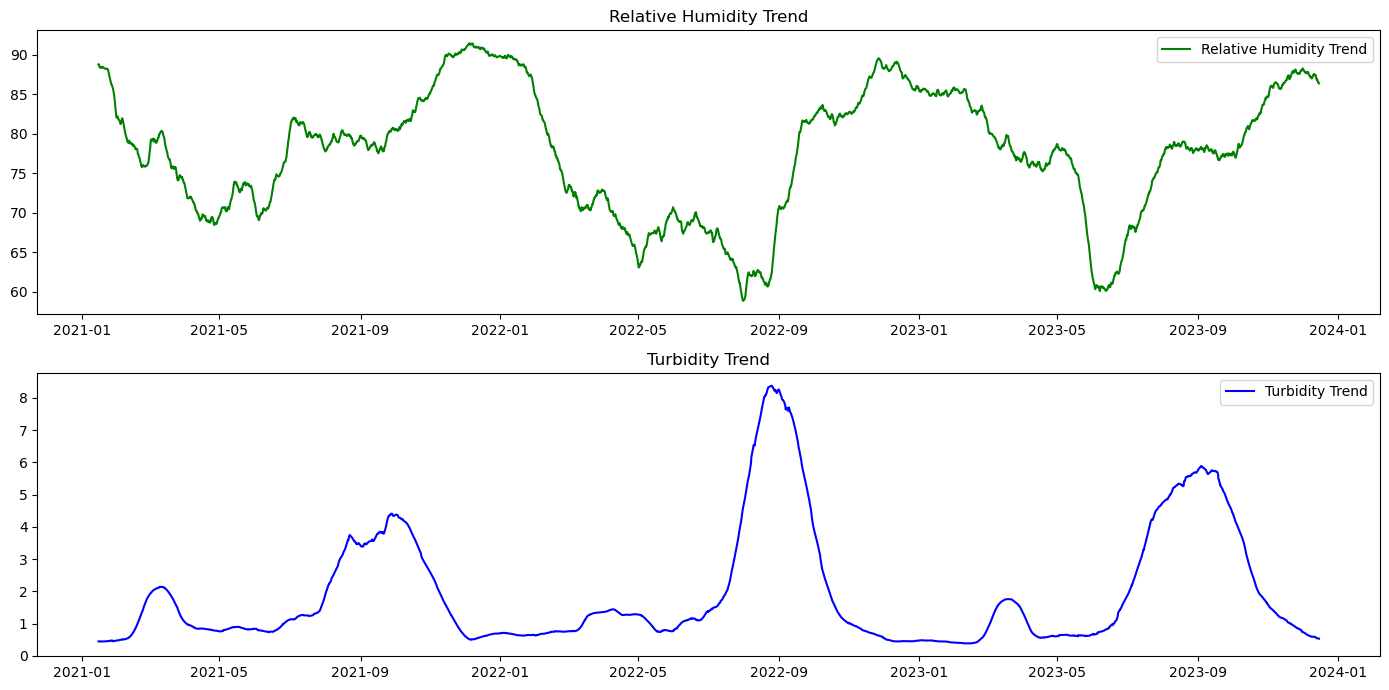

<Figure size 1400x1000 with 0 Axes>

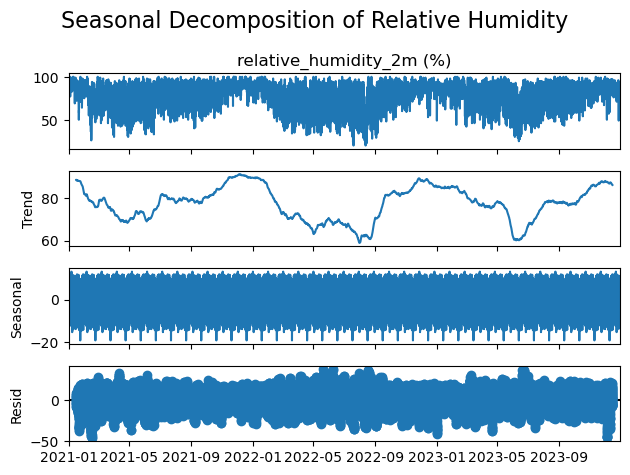

<Figure size 1400x1000 with 0 Axes>

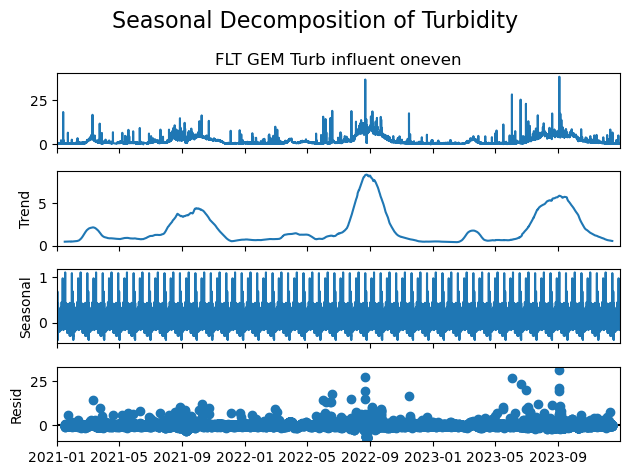

In [9]:
# decompose relative humidity data
result_humidity = seasonal_decompose(weather['relative_humidity_2m (%)'], model='additive', period=30*24)
# decompose turbidity data
result_turbidity_humidity = seasonal_decompose(df['FLT GEM Turb influent oneven'], model='additive', period=30*24)
# plot trends between turbidity and relative humidity
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(result_humidity.trend, label='Relative Humidity Trend', color='green')
plt.title('Relative Humidity Trend')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(result_turbidity_humidity.trend, label='Turbidity Trend', color='blue')
plt.title('Turbidity Trend')
plt.legend()
plt.tight_layout()
plt.show()
# Plotting the seasonal decomposition of relative humidity
plt.figure(figsize=(14, 10))
result_humidity.plot()
plt.suptitle('Seasonal Decomposition of Relative Humidity', fontsize=16)
plt.tight_layout()
plt.show()
# Plotting the seasonal decomposition of turbidity with respect to relative humidity
plt.figure(figsize=(14, 10))
result_turbidity_humidity.plot()
plt.suptitle('Seasonal Decomposition of Turbidity', fontsize=16)
plt.tight_layout()
plt.show()



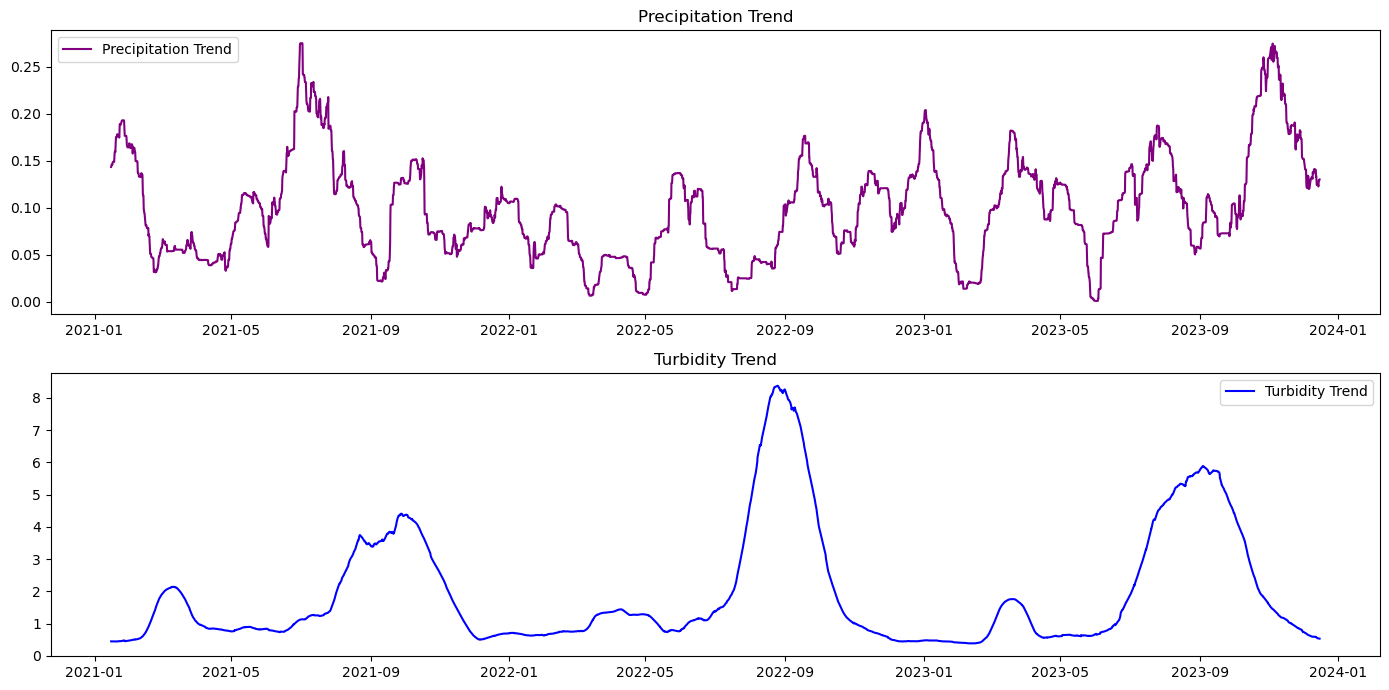

<Figure size 1400x1000 with 0 Axes>

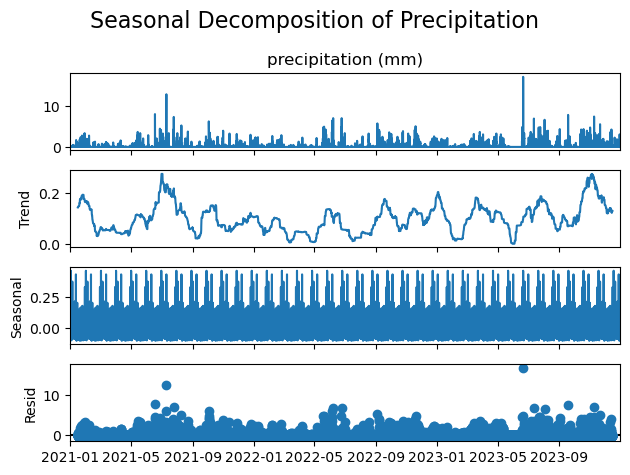

<Figure size 1400x1000 with 0 Axes>

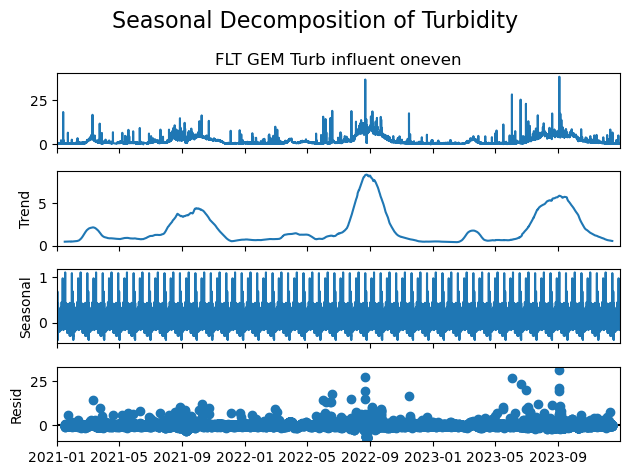

In [10]:
# decomose precipitation data
result_precipitation = seasonal_decompose(weather['precipitation (mm)'], model='additive', period=30*24)
# decompose turbidity data
result_turbidity_precipitation = seasonal_decompose(df['FLT GEM Turb influent oneven'], model='additive', period=30*24)
# plot trends between turbidity and precipitation
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(result_precipitation.trend, label='Precipitation Trend', color='purple')
plt.title('Precipitation Trend')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(result_turbidity_precipitation.trend, label='Turbidity Trend', color='blue')
plt.title('Turbidity Trend')
plt.legend()
plt.tight_layout()
plt.show()
# Plotting the seasonal decomposition of precipitation
plt.figure(figsize=(14, 10))
result_precipitation.plot()
plt.suptitle('Seasonal Decomposition of Precipitation', fontsize=16)
plt.tight_layout()
plt.show()
# Plotting the seasonal decomposition of turbidity with respect to precipitation
plt.figure(figsize=(14, 10))
result_turbidity_precipitation.plot()
plt.suptitle('Seasonal Decomposition of Turbidity', fontsize=16)
plt.tight_layout()
plt.show()


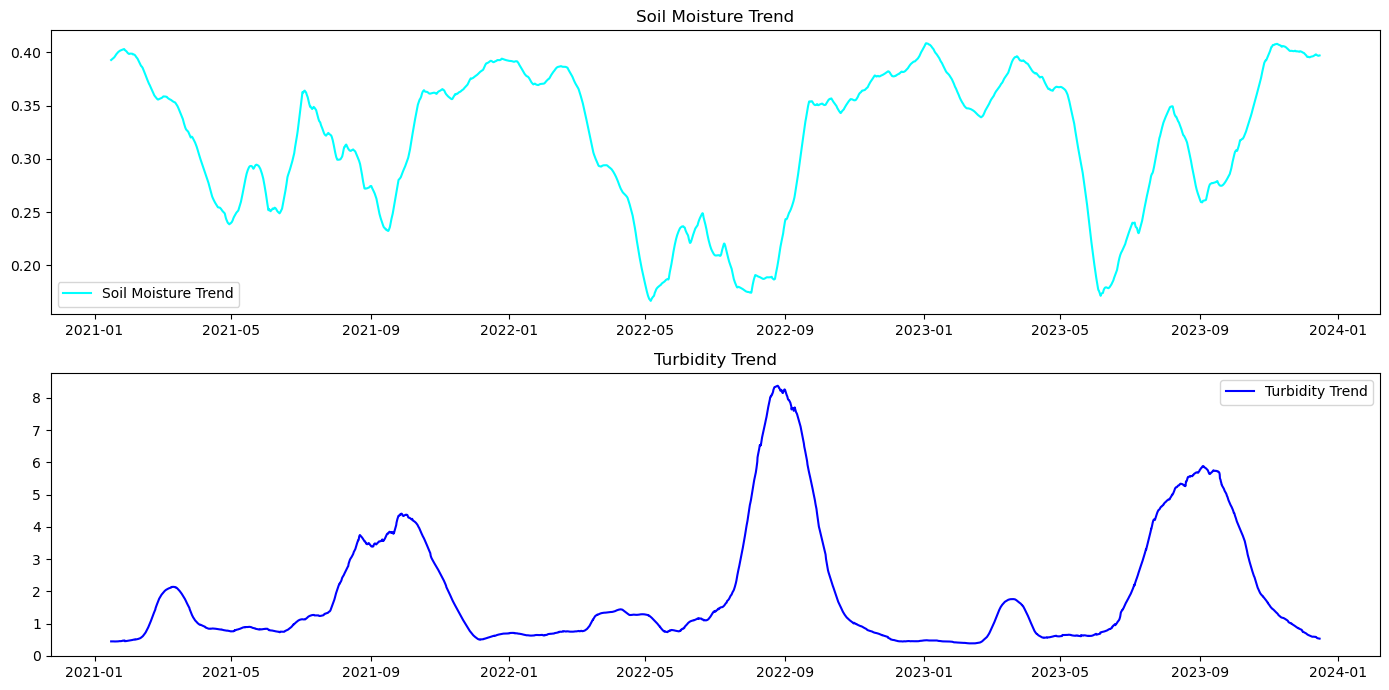

<Figure size 1400x1000 with 0 Axes>

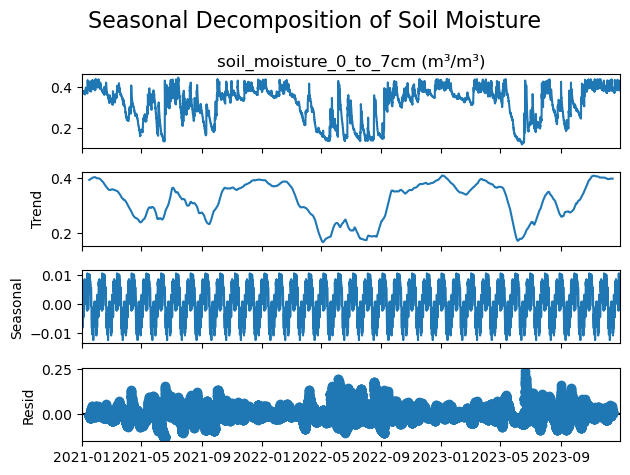

<Figure size 1400x1000 with 0 Axes>

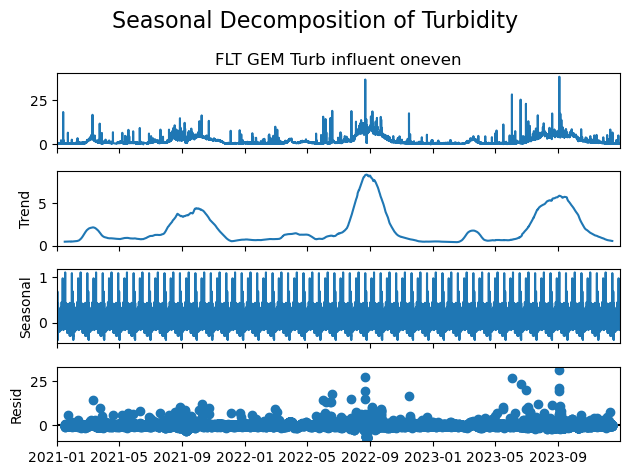

In [11]:
# decomise soil moisture data
result_soil_moisture = seasonal_decompose(weather['soil_moisture_0_to_7cm (m³/m³)'], model='additive', period=30*24)
# decompose turbidity data
result_turbidity_soil_moisture = seasonal_decompose(df['FLT GEM Turb influent oneven'], model='additive', period=30*24)
# plot trends between turbidity and soil moisture
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(result_soil_moisture.trend, label='Soil Moisture Trend', color='cyan')
plt.title('Soil Moisture Trend')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(result_turbidity_soil_moisture.trend, label='Turbidity Trend', color='blue')
plt.title('Turbidity Trend')
plt.legend()
plt.tight_layout()
plt.show()
# Plotting the seasonal decomposition of soil moisture
plt.figure(figsize=(14, 10))
result_soil_moisture.plot()
plt.suptitle('Seasonal Decomposition of Soil Moisture', fontsize=16)
plt.tight_layout()
plt.show()
# Plotting the seasonal decomposition of turbidity with respect to soil moisture
plt.figure(figsize=(14, 10))
result_turbidity_soil_moisture.plot()
plt.suptitle('Seasonal Decomposition of Turbidity', fontsize=16)
plt.tight_layout()
plt.show()



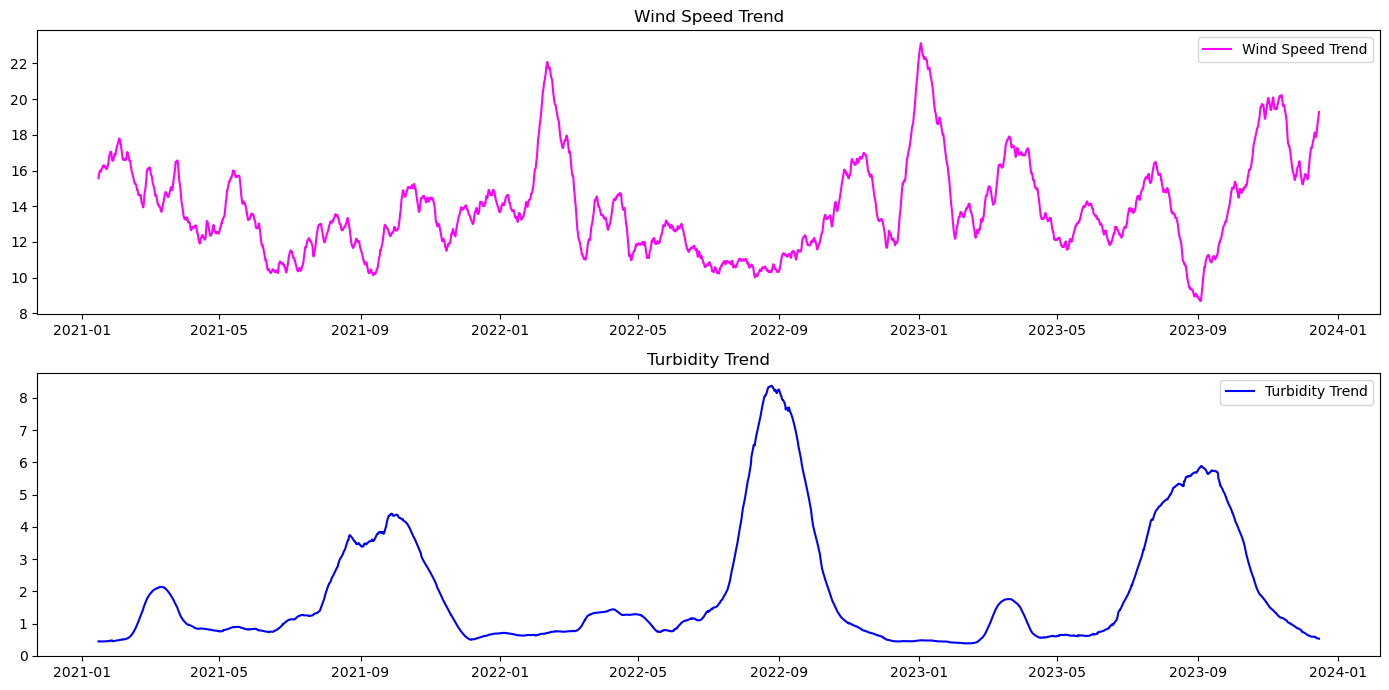

<Figure size 1400x1000 with 0 Axes>

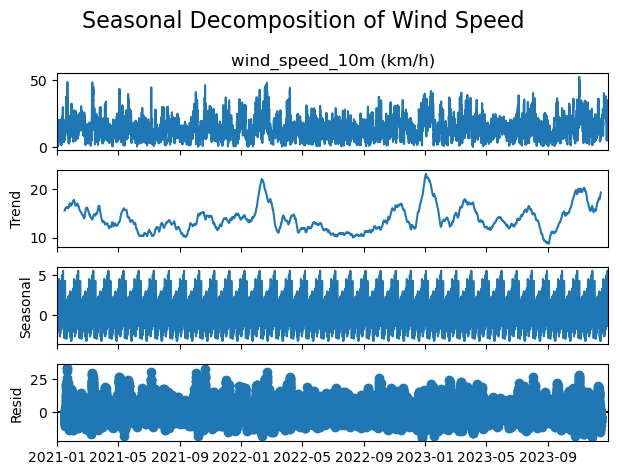

<Figure size 1400x1000 with 0 Axes>

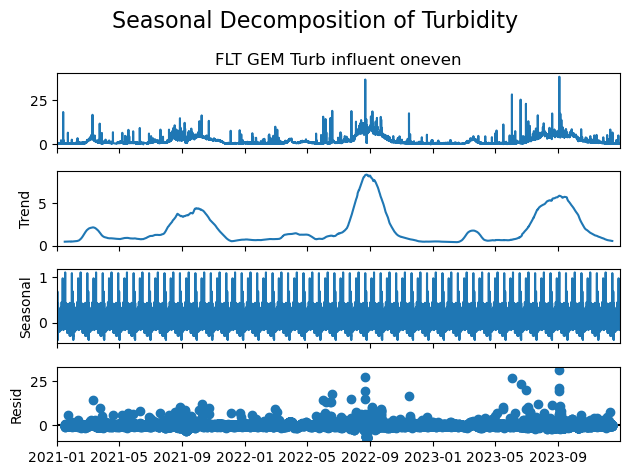

In [12]:
# decomposed wind speed data
result_wind_speed = seasonal_decompose(weather['wind_speed_10m (km/h)'], model='additive', period=30*24)
# decompose turbidity data
result_turbidity_wind_speed = seasonal_decompose(df['FLT GEM Turb influent oneven'], model='additive', period=30*24)
# plot trends between turbidity and wind speed
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(result_wind_speed.trend, label='Wind Speed Trend', color='magenta')
plt.title('Wind Speed Trend')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(result_turbidity_wind_speed.trend, label='Turbidity Trend', color='blue')
plt.title('Turbidity Trend')
plt.legend()
plt.tight_layout()
plt.show()
# Plotting the seasonal decomposition of wind speed
plt.figure(figsize=(14, 10))
result_wind_speed.plot()
plt.suptitle('Seasonal Decomposition of Wind Speed', fontsize=16)
plt.tight_layout()
plt.show()
# Plotting the seasonal decomposition of turbidity with respect to wind speed
plt.figure(figsize=(14, 10))
result_turbidity_wind_speed.plot()
plt.suptitle('Seasonal Decomposition of Turbidity', fontsize=16)
plt.tight_layout()
plt.show()

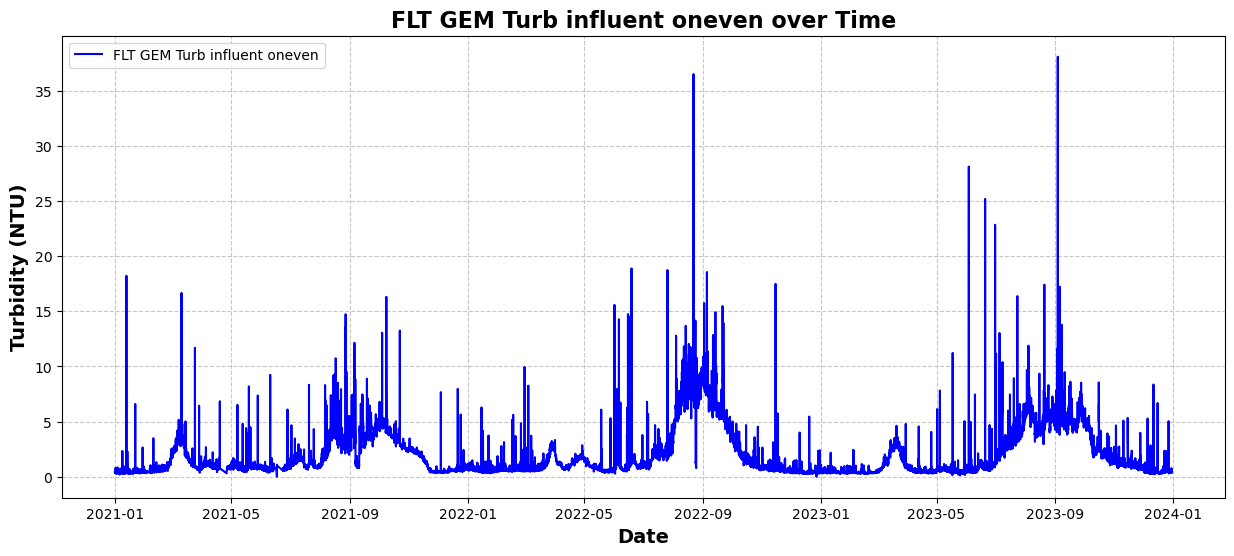

In [13]:
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['FLT GEM Turb influent oneven'], label ='FLT GEM Turb influent oneven', color='blue')
plt.title('FLT GEM Turb influent oneven over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14, fontweight='bold')  
plt.ylabel('Turbidity (NTU)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [14]:
df['FLT GEM Turb influent oneven'].describe()



count    26251.000000
mean         1.908404
std          2.147862
min          0.000000
25%          0.564904
50%          0.932202
75%          2.502558
max         38.074150
Name: FLT GEM Turb influent oneven, dtype: float64

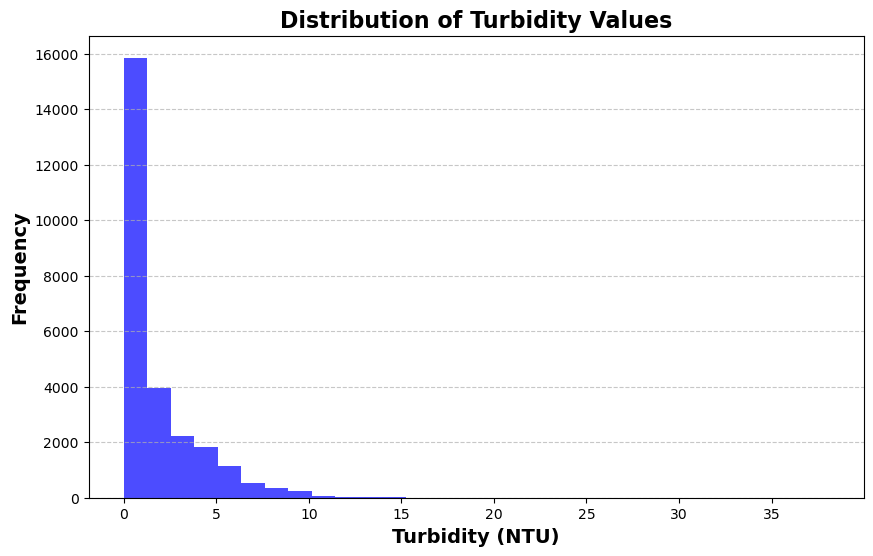

In [15]:
# Plotting the distribution of turbidity values
plt.figure(figsize=(10, 6))
plt.hist(df['FLT GEM Turb influent oneven'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Turbidity Values', fontsize=16, fontweight='bold')
plt.xlabel('Turbidity (NTU)', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

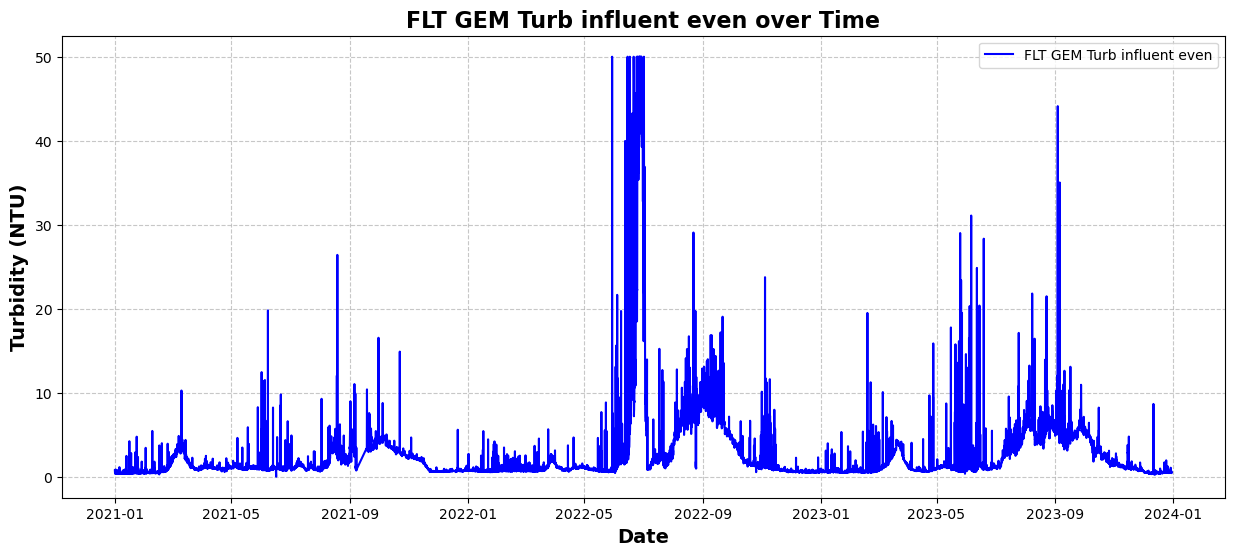

In [16]:
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['FLT GEM Turb influent even'], label ='FLT GEM Turb influent even', color='blue')
plt.title('FLT GEM Turb influent even over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14, fontweight='bold')  
plt.ylabel('Turbidity (NTU)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Decomposition

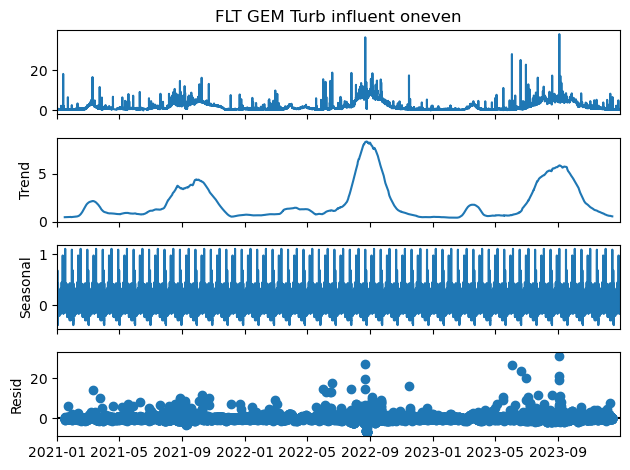

In [17]:
# Decomposing the time series
decomposition_oneven = seasonal_decompose(df['FLT GEM Turb influent oneven'], model='additive', period=24*30)  
decomposition_oneven.plot()
plt.show()

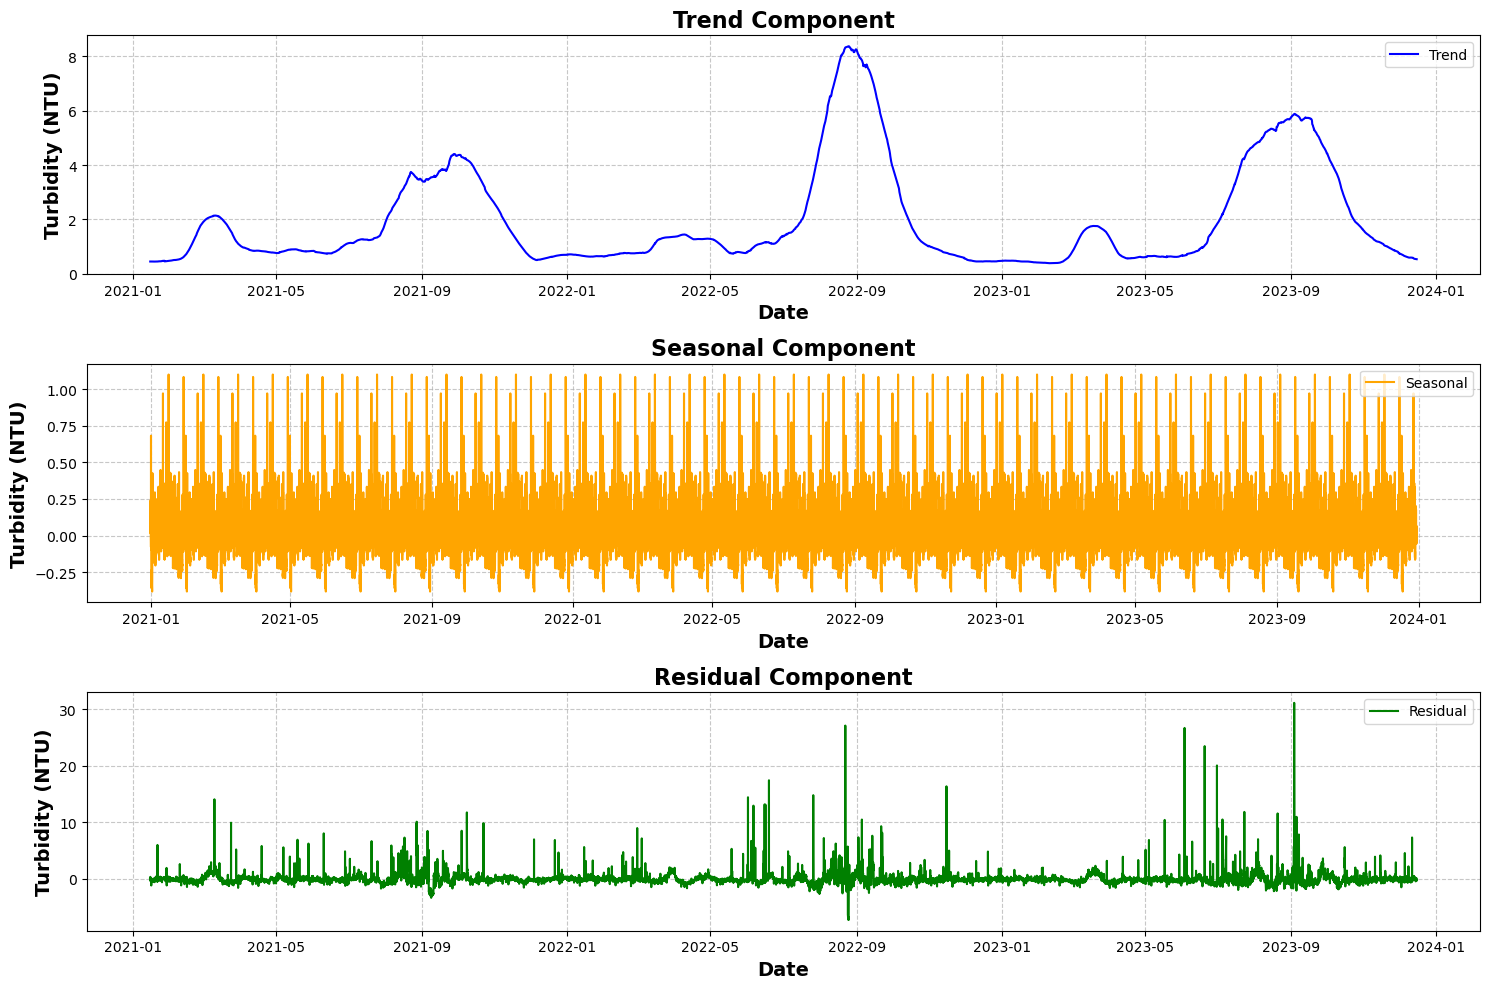

In [18]:
# Plot the trend, seasonal, and residual components
plt.figure(figsize=(15, 10))
plt.subplot(311)
plt.plot(decomposition_oneven.trend, label='Trend', color='blue')
plt.title('Trend Component', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Turbidity (NTU)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.subplot(312)
plt.plot(decomposition_oneven.seasonal, label='Seasonal', color='orange')
plt.title('Seasonal Component', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Turbidity (NTU)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.subplot(313)
plt.plot(decomposition_oneven.resid, label='Residual', color='green')
plt.title('Residual Component', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Turbidity (NTU)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

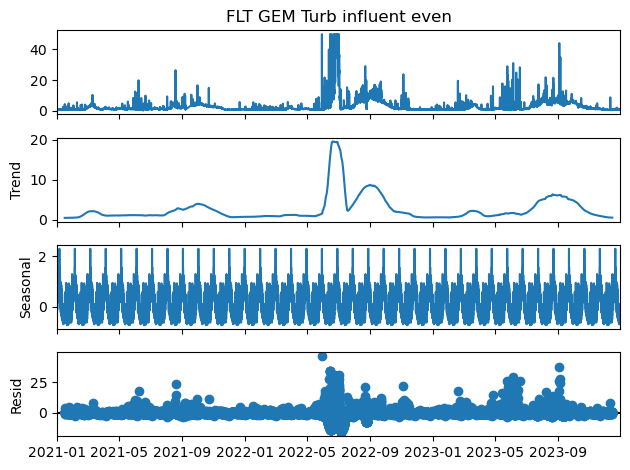

In [19]:
# Decomposing the time series
decomposition_even = seasonal_decompose(df['FLT GEM Turb influent even'], model='additive', period=24*30)  
decomposition_even.plot()
plt.show()

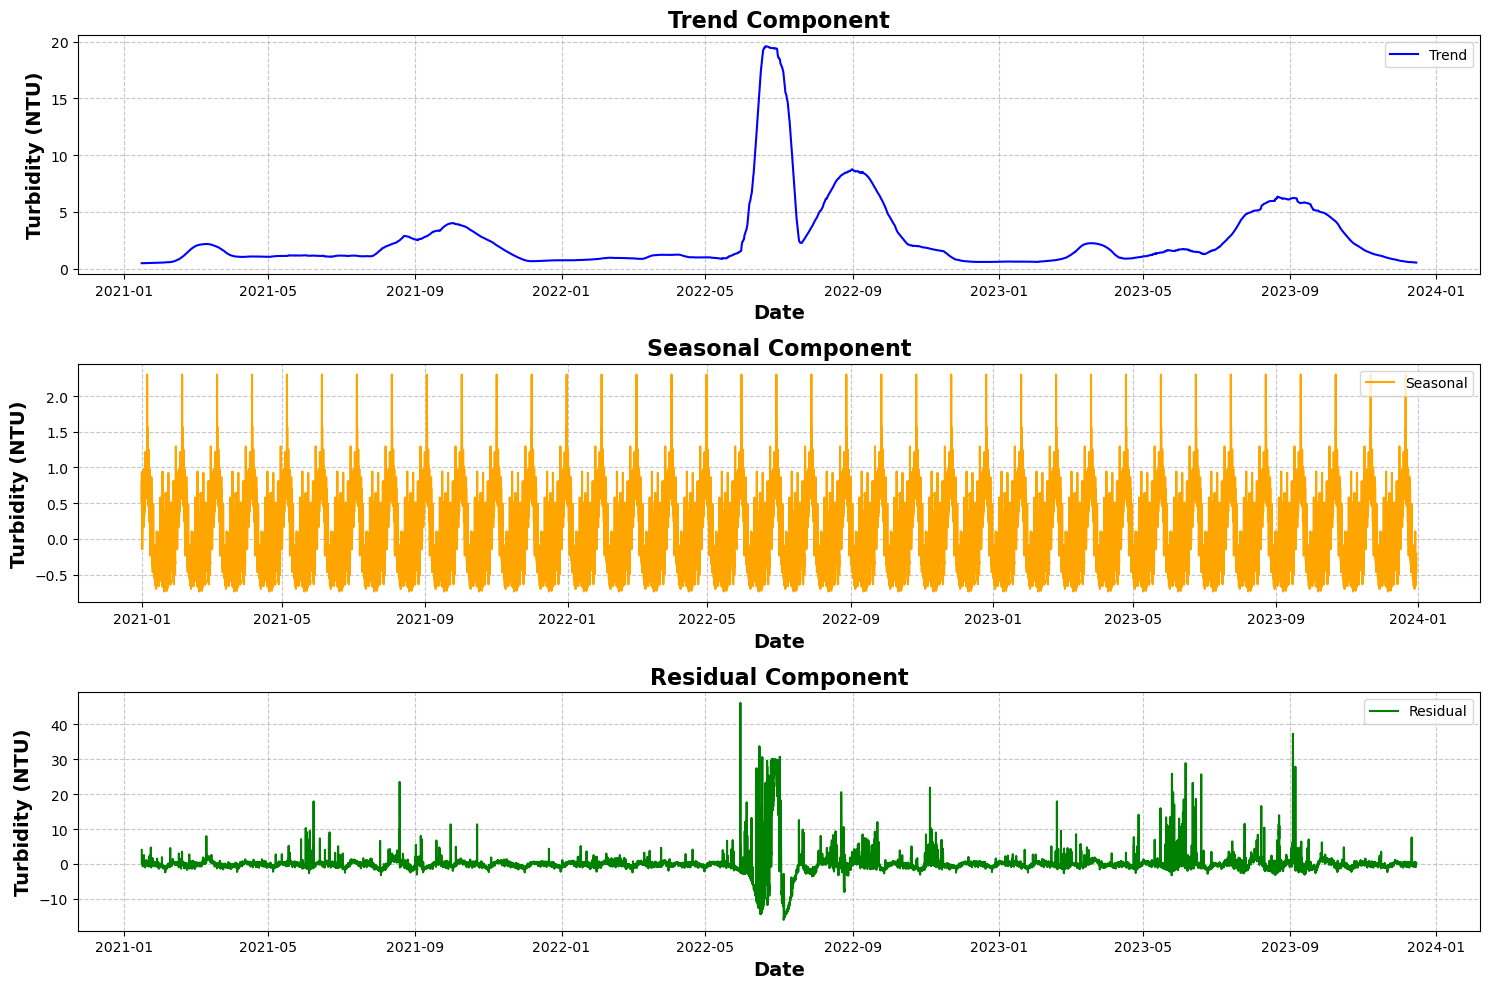

In [20]:
# Plot the trend, seasonal, and residual components
plt.figure(figsize=(15, 10))
plt.subplot(311)
plt.plot(decomposition_even.trend, label='Trend', color='blue')
plt.title('Trend Component', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Turbidity (NTU)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.subplot(312)
plt.plot(decomposition_even.seasonal, label='Seasonal', color='orange')
plt.title('Seasonal Component', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Turbidity (NTU)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.subplot(313)
plt.plot(decomposition_even.resid, label='Residual', color='green')
plt.title('Residual Component', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Turbidity (NTU)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Descriptive statistics

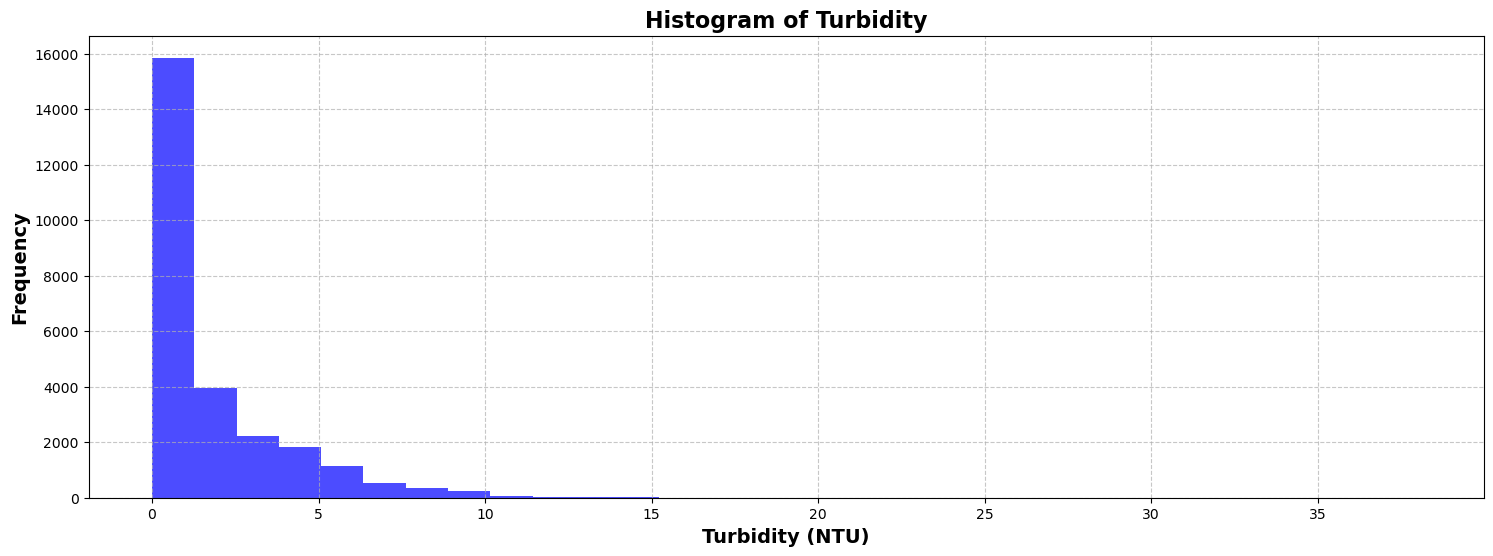

In [21]:
# Histogram of Turbidity
plt.figure(figsize=(18, 6))
plt.hist(df['FLT GEM Turb influent oneven'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Turbidity', fontsize=16, fontweight='bold')
plt.xlabel('Turbidity (NTU)', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()



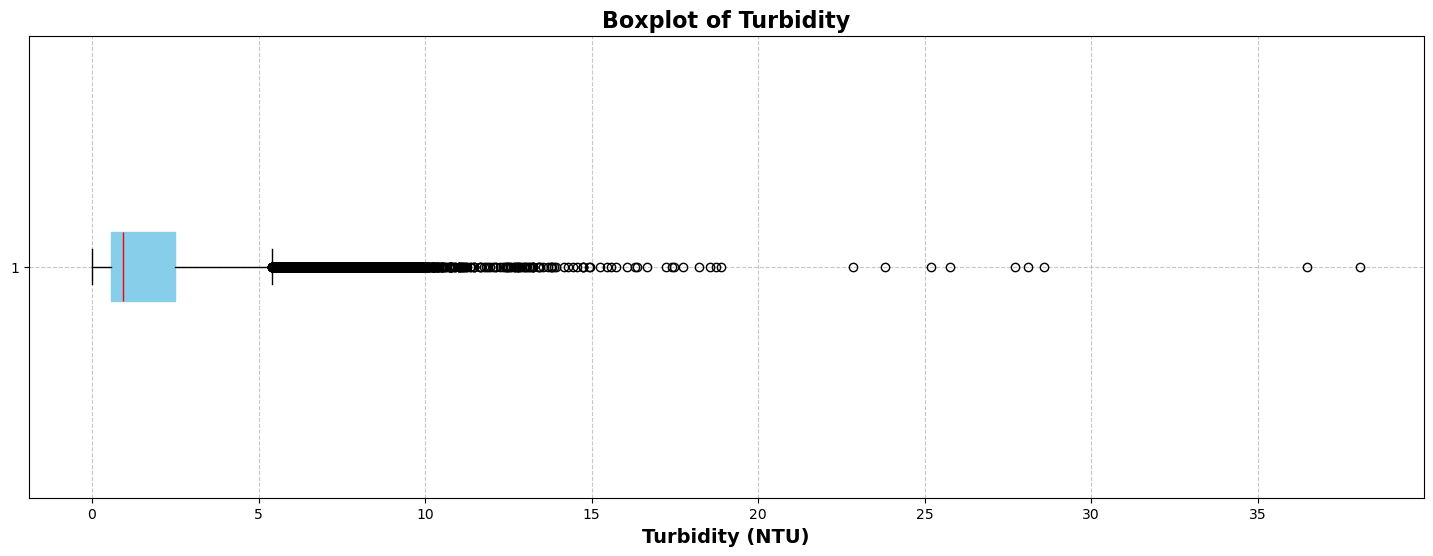

In [22]:
# Boxplot of Turbidity
plt.figure(figsize=(18, 6))
plt.boxplot(df['FLT GEM Turb influent oneven'], vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue', color='skyblue'), medianprops=dict(color='red'))
plt.title('Boxplot of Turbidity', fontsize=16, fontweight='bold')
plt.xlabel('Turbidity (NTU)', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()



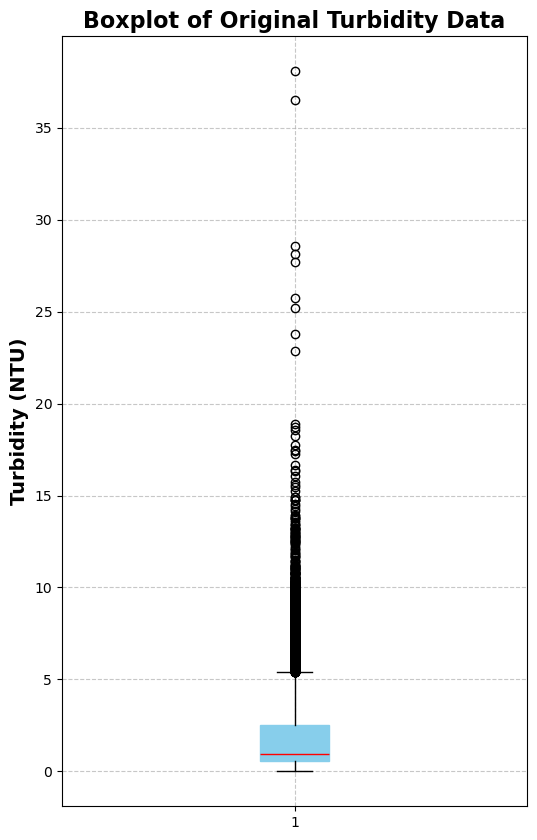

In [23]:
# Boxplot of Turbidity vertically
plt.figure(figsize=(6, 10))
plt.boxplot(df['FLT GEM Turb influent oneven'], vert=True, patch_artist=True, boxprops=dict(facecolor='skyblue', color='skyblue'), medianprops=dict(color='red'))
plt.title('Boxplot of Original Turbidity Data', fontsize=16, fontweight='bold')
plt.ylabel('Turbidity (NTU)', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


C:\Users\Yin Jianing\AppData\Local\Temp\ipykernel_21604\3793265877.py:51: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(boxplot_data, labels=labels, patch_artist=True)


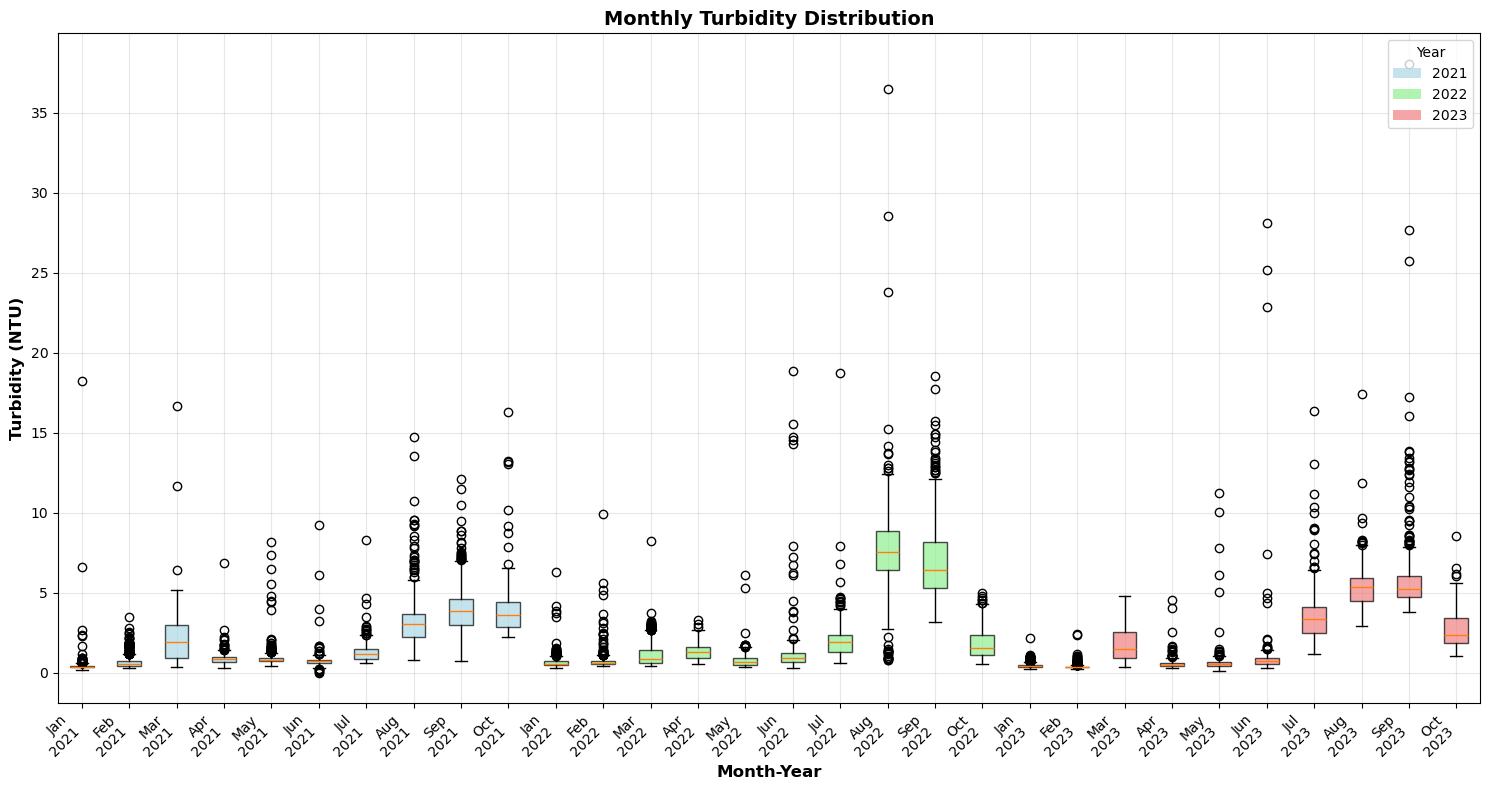

Summary Statistics by Year-Month:
--------------------------------------------------
Jan 2021: Mean=0.45, Median=0.39, Count=744
Feb 2021: Mean=0.70, Median=0.57, Count=672
Mar 2021: Mean=2.01, Median=1.90, Count=744
Apr 2021: Mean=0.85, Median=0.84, Count=720
May 2021: Mean=0.90, Median=0.82, Count=744
Jun 2021: Mean=0.75, Median=0.71, Count=720
Jul 2021: Mean=1.24, Median=1.17, Count=744
Aug 2021: Mean=3.13, Median=3.03, Count=744
Sep 2021: Mean=3.78, Median=3.88, Count=720
Oct 2021: Mean=3.74, Median=3.61, Count=744
Jan 2022: Mean=0.65, Median=0.58, Count=744
Feb 2022: Mean=0.75, Median=0.63, Count=672
Mar 2022: Mean=1.18, Median=0.83, Count=744
Apr 2022: Mean=1.29, Median=1.31, Count=720
May 2022: Mean=0.80, Median=0.69, Count=744
Jun 2022: Mean=1.16, Median=0.92, Count=720
Jul 2022: Mean=1.96, Median=1.91, Count=744
Aug 2022: Mean=7.56, Median=7.54, Count=744
Sep 2022: Mean=6.85, Median=6.41, Count=720
Oct 2022: Mean=1.80, Median=1.53, Count=744
Jan 2023: Mean=0.46, Median=0.43, C

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming your data is in a DataFrame with 'date' and 'turbidity' columns
# df = pd.read_csv('your_data.csv')
# df['date'] = pd.to_datetime(df['date'])

# Create sample data structure (replace with your actual data loading)
# dates = pd.date_range('2021-01-01', '2023-10-31', freq='D')
# turbidity = np.random.exponential(5, len(dates))  # Replace with your actual data
# df = pd.DataFrame({'date': dates, 'turbidity': turbidity})

# Extract year and month from the DatetimeIndex
df['year'] = df.index.year
df['month'] = df.index.month
df['month_name'] = df.index.strftime('%b')

# Create year-month combination for grouping
df['year_month'] = df.index.to_period('M')

# Filter for your desired months (Jan-Oct) and years
months_to_include = list(range(1, 11))  # Jan (1) to Oct (10)
years_to_include = [2021, 2022, 2023]  # Adjust as needed

filtered_df = df[
    (df['month'].isin(months_to_include)) & 
    (df['year'].isin(years_to_include))
]

# Create the boxplot
fig, ax = plt.subplots(figsize=(15, 8))

# Get unique year-month combinations in chronological order
year_months = sorted(filtered_df['year_month'].unique())

# Prepare data for boxplot
boxplot_data = []
labels = []

for ym in year_months:
    data = filtered_df[filtered_df['year_month'] == ym]['FLT GEM Turb influent oneven'].values
    if len(data) > 0:  # Only include if there's data
        boxplot_data.append(data)
        # Create label with month name and year
        month_name = pd.to_datetime(str(ym)).strftime('%b')
        year = pd.to_datetime(str(ym)).year
        labels.append(f"{month_name}\n{year}")

# Create boxplot
bp = ax.boxplot(boxplot_data, labels=labels, patch_artist=True)

# Customize colors for different years
colors = ['lightblue', 'lightgreen', 'lightcoral']  # Add more colors if needed
year_color_map = {year: colors[i % len(colors)] for i, year in enumerate(years_to_include)}

for i, (patch, label) in enumerate(zip(bp['boxes'], labels)):
    year = int(label.split('\n')[1])
    patch.set_facecolor(year_color_map[year])
    patch.set_alpha(0.7)

# Customize the plot
ax.set_xlabel('Month-Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Turbidity (NTU)', fontsize=12, fontweight='bold')
ax.set_title('Monthly Turbidity Distribution', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add legend for years
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=year_color_map[year], alpha=0.7, label=str(year)) 
                  for year in years_to_include]
ax.legend(handles=legend_elements, title='Year', loc='upper right')

plt.tight_layout()
plt.show()

# Optional: Print summary statistics
print("Summary Statistics by Year-Month:")
print("-" * 50)
for ym in year_months:
    data = filtered_df[filtered_df['year_month'] == ym]['FLT GEM Turb influent oneven']
    if len(data) > 0:
        month_name = pd.to_datetime(str(ym)).strftime('%b %Y')
        print(f"{month_name}: Mean={data.mean():.2f}, Median={data.median():.2f}, Count={len(data)}")

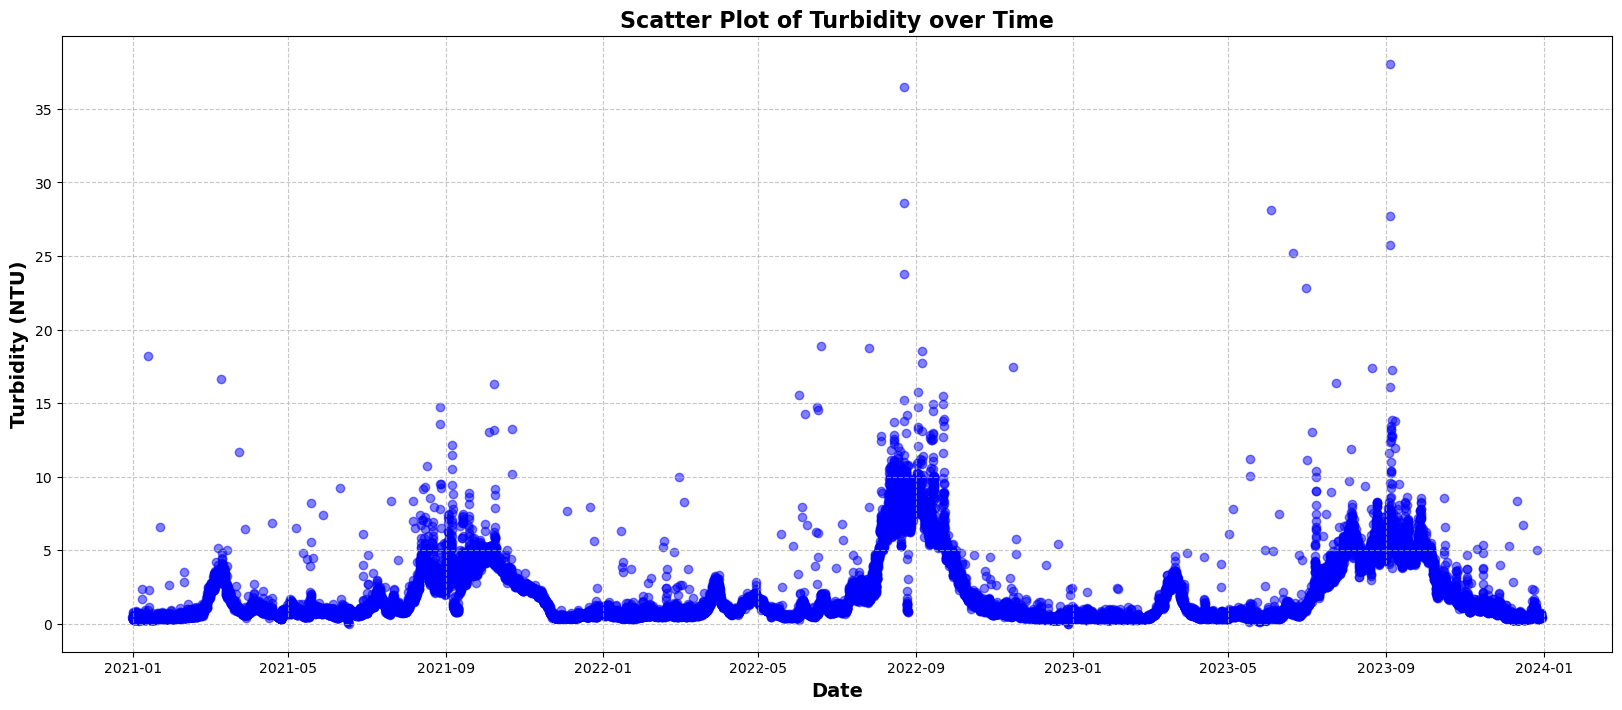

In [25]:
# Scatter plot of Turbidity over time
plt.figure(figsize=(20, 8))
plt.scatter(df.index, df['FLT GEM Turb influent oneven'], color='blue', alpha=0.5)
plt.title('Scatter Plot of Turbidity over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Turbidity (NTU)', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


# Anomaly

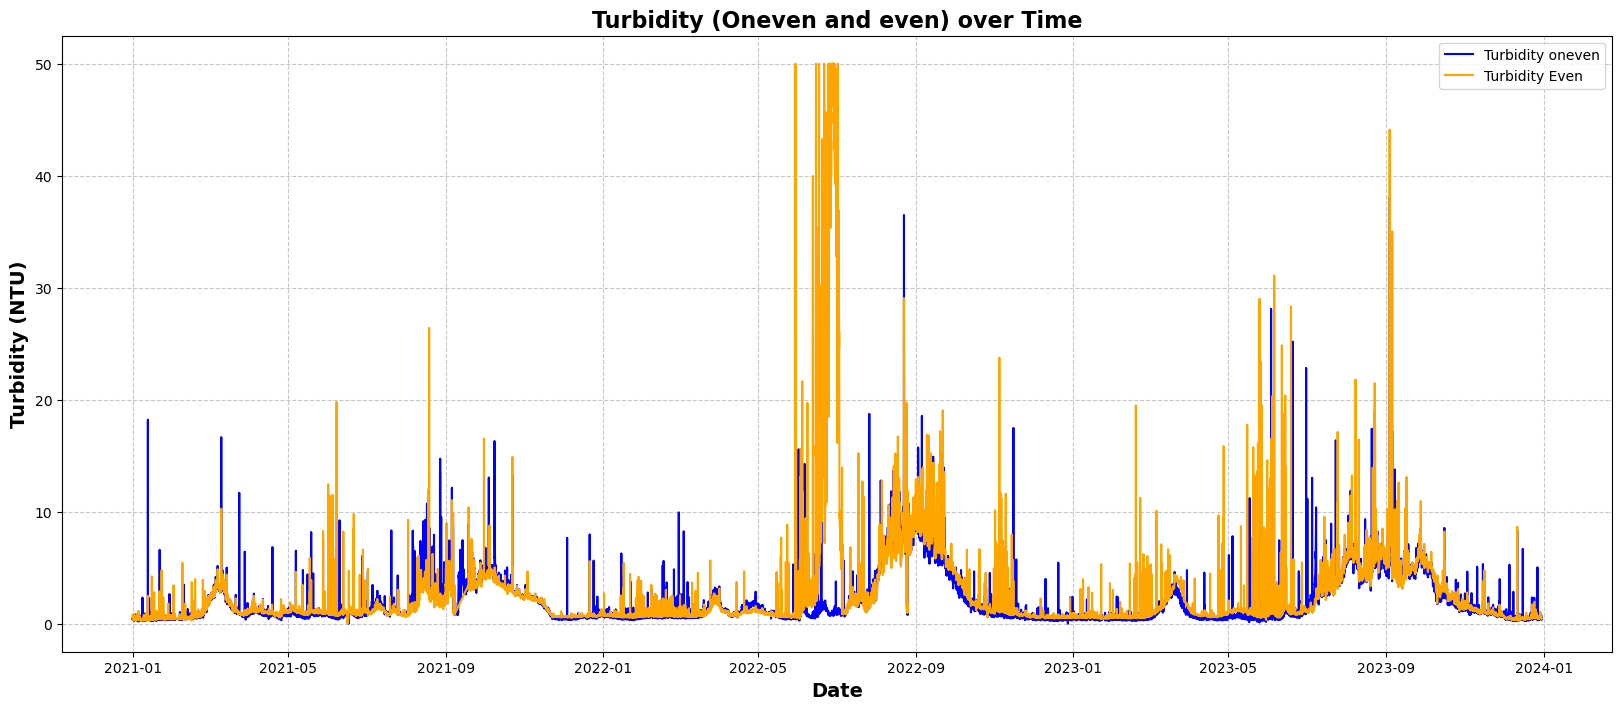

In [26]:
plt.figure(figsize=(20, 8))
plt.plot(df.index, df['FLT GEM Turb influent oneven'], label='Turbidity oneven', color='blue')
plt.plot(df.index, df['FLT GEM Turb influent even'], label='Turbidity Even', color='orange')
plt.title('Turbidity (Oneven and even) over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Turbidity (NTU)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


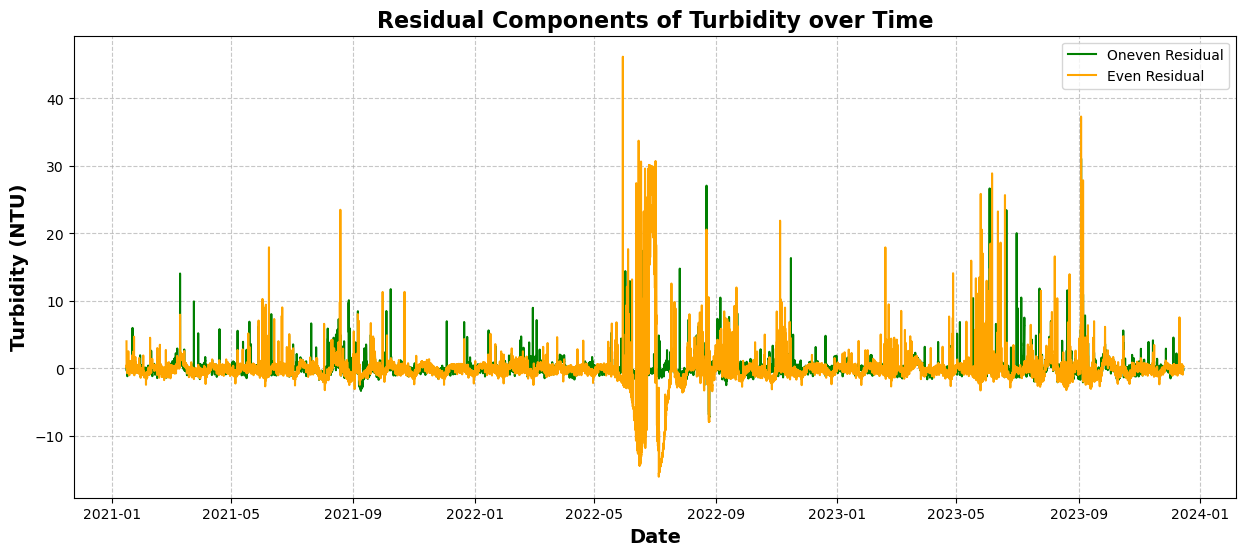

In [27]:
# PLot the residual component of Jianing_FLT
plt.figure(figsize=(15, 6))
plt.plot(decomposition_oneven.resid, label='Oneven Residual', color='green')
plt.plot(decomposition_even.resid, label='Even Residual', color='orange')
plt.title('Residual Components of Turbidity over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Turbidity (NTU)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

residuals = decomposition_oneven.resid

In [29]:

def analyze_residual_outliers(residuals, multiplier=1.5, plot=True):
    """
    Comprehensive analysis of residual outliers using IQR method
    
    Parameters:
    residuals: pandas Series of residual values
    multiplier: IQR multiplier (default 1.5)
    plot: whether to create visualization
    
    Returns:
    dict with outlier analysis results
    """
    
    # Calculate quartiles and IQR
    Q1 = residuals.quantile(0.25)
    Q3 = residuals.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    
    # Identify outliers
    outliers = residuals[(residuals < lower_bound) | (residuals > upper_bound)]
    
    # Calculate statistics
    outlier_percentage = (len(outliers) / len(residuals)) * 100
    
    # Print summary
    print("=== Residual Outlier Analysis ===")
    print(f"Total residuals: {len(residuals)}")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Percentage of outliers: {outlier_percentage:.2f}%")
    print(f"Q1: {Q1:.4f}")
    print(f"Q3: {Q3:.4f}")
    print(f"IQR: {IQR:.4f}")
    print(f"Lower bound: {lower_bound:.4f}")
    print(f"Upper bound: {upper_bound:.4f}")
    
    if len(outliers) > 0:
        print(f"Min outlier value: {outliers.min():.4f}")
        print(f"Max outlier value: {outliers.max():.4f}")
        print(f"Outlier dates: {outliers.index.tolist()[:5]}...")  # Show first 5
    
    if plot:
        # Create comprehensive visualization
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        
        # 1. Time series plot with outliers
        axes[0, 0].plot(residuals.index, residuals, label='Residuals', 
                       color='green', alpha=0.7, linewidth=1)
        axes[0, 0].scatter(outliers.index, outliers, color='red', 
                          label=f'Outliers ({len(outliers)})', zorder=5, s=30)
        axes[0, 0].axhline(y=lower_bound, color='orange', linestyle='--', 
                          label=f'Bounds (±{multiplier}×IQR)')
        axes[0, 0].axhline(y=upper_bound, color='orange', linestyle='--')
        axes[0, 0].set_title('Residuals with Outliers Highlighted', 
                            fontsize=14, fontweight='bold')
        axes[0, 0].set_xlabel('Date', fontweight='bold')
        axes[0, 0].set_ylabel('Residuals', fontweight='bold')
        axes[0, 0].legend()
        axes[0, 0].grid(True, linestyle='--', alpha=0.7)
        
        # 2. Histogram with outliers highlighted
        axes[0, 1].hist(residuals, bins=50, alpha=0.7, color='lightblue', 
                       label='All Residuals', density=True)
        if len(outliers) > 0:
            axes[0, 1].hist(outliers, bins=20, alpha=0.8, color='red', 
                           label='Outliers', density=True)
        axes[0, 1].axvline(x=lower_bound, color='orange', linestyle='--', 
                          label='IQR Bounds')
        axes[0, 1].axvline(x=upper_bound, color='orange', linestyle='--')
        axes[0, 1].set_title('Distribution of Residuals', 
                            fontsize=14, fontweight='bold')
        axes[0, 1].set_xlabel('Residual Value', fontweight='bold')
        axes[0, 1].set_ylabel('Density', fontweight='bold')
        axes[0, 1].legend()
        axes[0, 1].grid(True, alpha=0.3)
        
        # 3. Box plot
        box_data = [residuals]
        axes[1, 0].boxplot(box_data, labels=['Residuals'])
        axes[1, 0].scatter([1] * len(outliers), outliers, color='red', 
                          alpha=0.6, s=20)
        axes[1, 0].set_title('Box Plot of Residuals', 
                            fontsize=14, fontweight='bold')
        axes[1, 0].set_ylabel('Residual Value', fontweight='bold')
        axes[1, 0].grid(True, alpha=0.3)
        
        # 4. Outlier magnitude over time
        if len(outliers) > 0:
            outlier_magnitude = np.abs(outliers)
            axes[1, 1].scatter(outliers.index, outlier_magnitude, 
                              color='red', alpha=0.7, s=40)
            axes[1, 1].set_title('Outlier Magnitude Over Time', 
                                fontsize=14, fontweight='bold')
            axes[1, 1].set_xlabel('Date', fontweight='bold')
            axes[1, 1].set_ylabel('|Outlier Value|', fontweight='bold')
            axes[1, 1].grid(True, alpha=0.3)
        else:
            axes[1, 1].text(0.5, 0.5, 'No outliers detected', 
                           ha='center', va='center', transform=axes[1, 1].transAxes,
                           fontsize=12)
            axes[1, 1].set_title('Outlier Magnitude Over Time', 
                                fontsize=14, fontweight='bold')
        
        plt.tight_layout()
        plt.show()
    
    return {
        'outliers': outliers,
        'outlier_count': len(outliers),
        'outlier_percentage': outlier_percentage,
        'bounds': (lower_bound, upper_bound),
        'statistics': {'Q1': Q1, 'Q3': Q3, 'IQR': IQR}
    }

=== Residual Outlier Analysis ===
Total residuals: 26251
Number of outliers: 2596
Percentage of outliers: 9.89%
Q1: -0.3392
Q3: 0.1581
IQR: 0.4974
Lower bound: -1.0853
Upper bound: 0.9042
Min outlier value: -7.2157
Max outlier value: 31.0959
Outlier dates: [Timestamp('2021-01-16 12:00:00'), Timestamp('2021-01-21 17:00:00'), Timestamp('2021-01-29 08:00:00'), Timestamp('2021-01-29 11:00:00'), Timestamp('2021-02-09 11:00:00')]...


C:\Users\Yin Jianing\AppData\Local\Temp\ipykernel_21604\3200859041.py:82: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 0].boxplot(box_data, labels=['Residuals'])


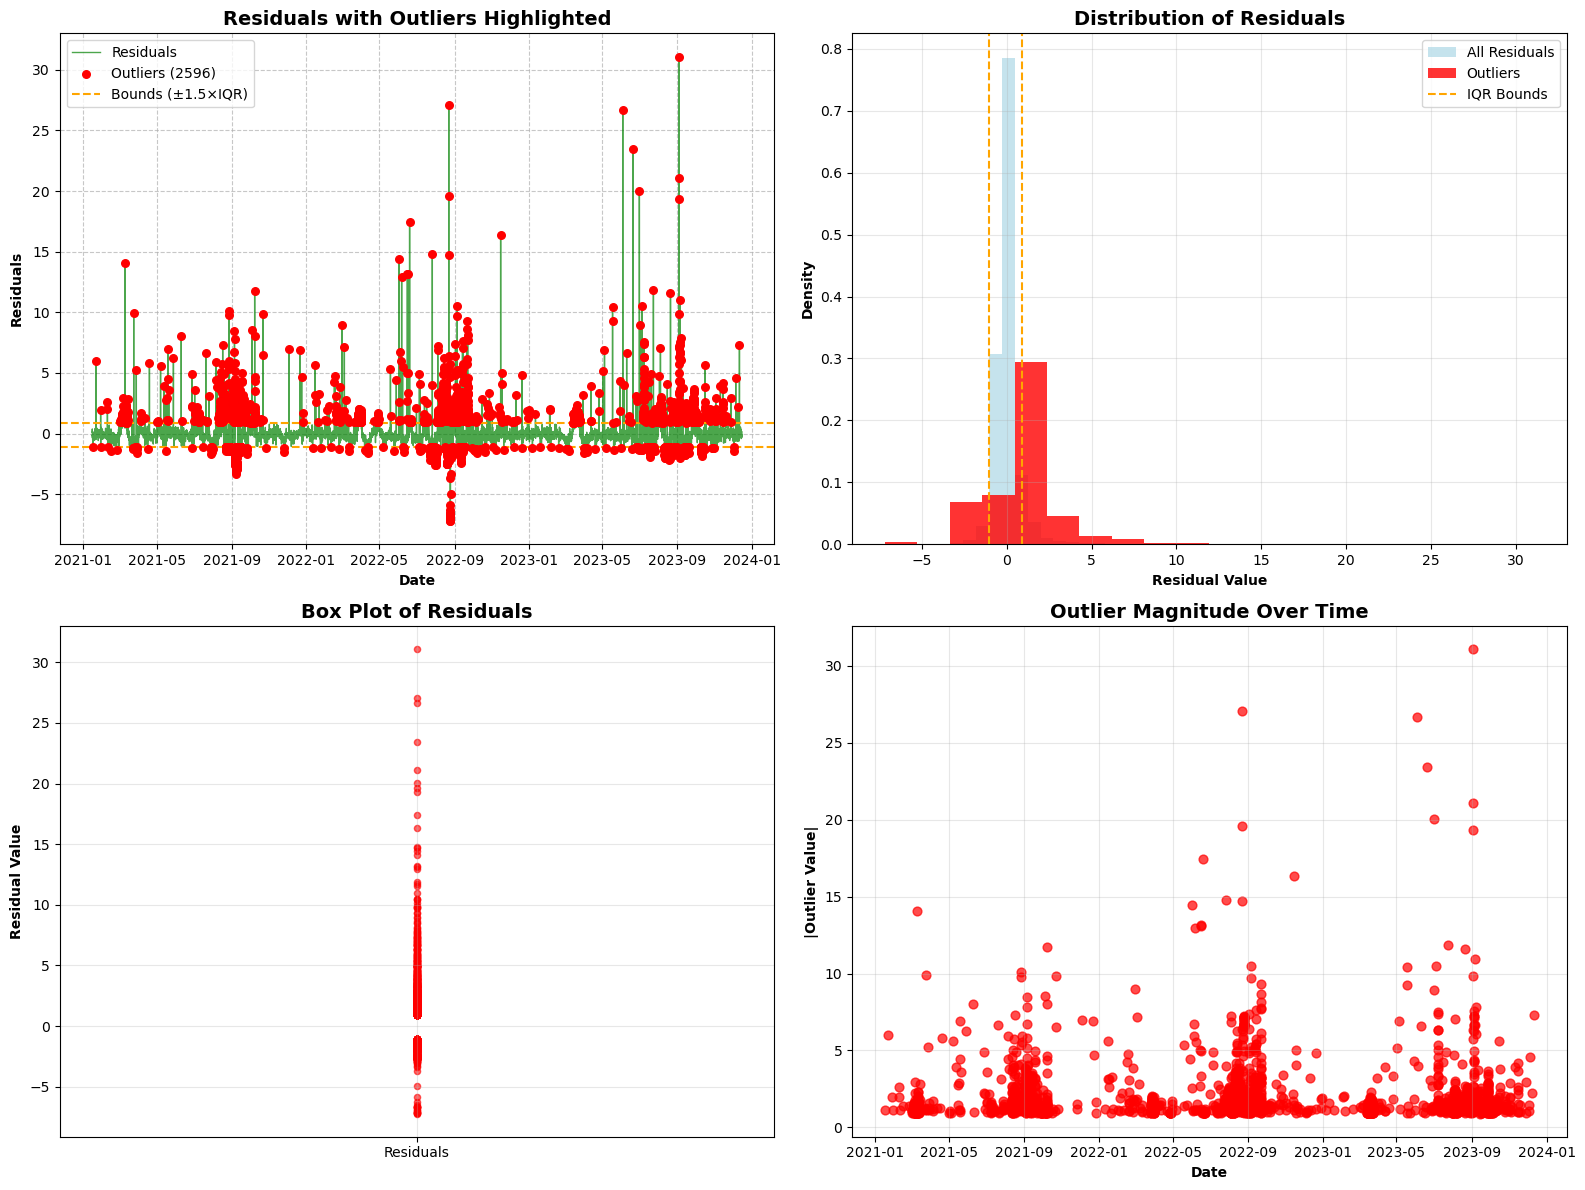

In [30]:
results = analyze_residual_outliers(residuals, multiplier=1.5, plot=True)


In [31]:
outliers = results['outliers']
print(f"Found {results['outlier_count']} outliers ({results['outlier_percentage']:.2f}%)")

Found 2596 outliers (9.89%)


In [32]:
print("\n=== Sensitivity Analysis ===")
for mult in [1.0, 1.5, 2.0, 2.5]:
    temp_results = analyze_residual_outliers(residuals, multiplier=mult, plot=False)
    print(f"Multiplier {mult}: {temp_results['outlier_count']} outliers "
          f"({temp_results['outlier_percentage']:.2f}%)")


=== Sensitivity Analysis ===
=== Residual Outlier Analysis ===
Total residuals: 26251
Number of outliers: 3926
Percentage of outliers: 14.96%
Q1: -0.3392
Q3: 0.1581
IQR: 0.4974
Lower bound: -0.8366
Upper bound: 0.6555
Min outlier value: -7.2157
Max outlier value: 31.0959
Outlier dates: [Timestamp('2021-01-16 12:00:00'), Timestamp('2021-01-21 17:00:00'), Timestamp('2021-01-29 08:00:00'), Timestamp('2021-01-29 11:00:00'), Timestamp('2021-02-09 11:00:00')]...
Multiplier 1.0: 3926 outliers (14.96%)
=== Residual Outlier Analysis ===
Total residuals: 26251
Number of outliers: 2596
Percentage of outliers: 9.89%
Q1: -0.3392
Q3: 0.1581
IQR: 0.4974
Lower bound: -1.0853
Upper bound: 0.9042
Min outlier value: -7.2157
Max outlier value: 31.0959
Outlier dates: [Timestamp('2021-01-16 12:00:00'), Timestamp('2021-01-21 17:00:00'), Timestamp('2021-01-29 08:00:00'), Timestamp('2021-01-29 11:00:00'), Timestamp('2021-02-09 11:00:00')]...
Multiplier 1.5: 2596 outliers (9.89%)
=== Residual Outlier Analysis 

In [33]:
# Additional utility functions
def compare_outlier_methods(residuals):
    """Compare different outlier detection methods"""
    
    # Z-score method (assuming normal distribution)
    z_scores = np.abs((residuals - residuals.mean()) / residuals.std())
    z_outliers = residuals[z_scores > 3]
    
    # IQR method
    Q1, Q3 = residuals.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    iqr_outliers = residuals[(residuals < (Q1 - 1.5 * IQR)) | 
                            (residuals > (Q3 + 1.5 * IQR))]
    
    print("=== Method Comparison ===")
    print(f"Z-score method (|z| > 3): {len(z_outliers)} outliers")
    print(f"IQR method (1.5×IQR): {len(iqr_outliers)} outliers")
    
    # Common outliers
    common = set(z_outliers.index) & set(iqr_outliers.index)
    print(f"Common outliers: {len(common)}")
    
    return {
        'z_score_outliers': z_outliers,
        'iqr_outliers': iqr_outliers,
        'common_outliers': residuals.loc[list(common)]
    }

In [34]:
compare_outlier_methods(residuals)

=== Method Comparison ===
Z-score method (|z| > 3): 300 outliers
IQR method (1.5×IQR): 2596 outliers
Common outliers: 300


{'z_score_outliers': Date
 2021-01-21 17:00:00     6.010627
 2021-03-07 17:00:00     2.964408
 2021-03-10 13:00:00    14.067403
 2021-03-24 12:00:00     9.935112
 2021-03-28 19:00:00     5.214546
                          ...    
 2023-11-14 19:00:00     3.641165
 2023-11-14 20:00:00     4.166559
 2023-11-27 21:00:00     2.940685
 2023-12-05 10:00:00     4.583227
 2023-12-11 12:00:00     7.329759
 Name: resid, Length: 300, dtype: float64,
 'iqr_outliers': Date
 2021-01-16 12:00:00   -1.145543
 2021-01-21 17:00:00    6.010627
 2021-01-29 08:00:00    1.957288
 2021-01-29 11:00:00   -1.140431
 2021-02-09 11:00:00    2.635897
                          ...   
 2023-12-02 11:00:00   -1.089080
 2023-12-02 12:00:00   -1.462664
 2023-12-05 10:00:00    4.583227
 2023-12-08 11:00:00    2.228896
 2023-12-11 12:00:00    7.329759
 Name: resid, Length: 2596, dtype: float64,
 'common_outliers': Date
 2022-09-22 21:00:00    3.311023
 2022-08-14 20:00:00    3.651478
 2022-08-25 07:00:00   -7.170672
 202

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

def remove_outliers_iqr(residuals, multiplier=1.5, replacement_method='interpolate'):
    """
    Remove outliers from residuals using IQR method
    
    Parameters:
    residuals: pandas Series of residual values
    multiplier: IQR multiplier (default 1.5)
    replacement_method: 'interpolate', 'median', 'mean', 'zero'
    
    Returns:
    dict with cleaned residuals and outlier information
    """
    # Drop NaN values
    clean_residuals = residuals.dropna().copy()
    
    # Calculate quartiles and IQR
    Q1 = clean_residuals.quantile(0.25)
    Q3 = clean_residuals.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    
    # Identify outliers
    outlier_mask = (clean_residuals < lower_bound) | (clean_residuals > upper_bound)
    outliers = clean_residuals[outlier_mask]
    
    # Replace outliers
    if replacement_method == 'interpolate':
        clean_residuals.loc[outlier_mask] = np.nan
        clean_residuals = clean_residuals.interpolate(method='linear')
    elif replacement_method == 'median':
        window_size = min(7, len(clean_residuals) // 10)
        rolling_median = clean_residuals.rolling(window=window_size, center=True).median()
        clean_residuals.loc[outlier_mask] = rolling_median.loc[outlier_mask]
    elif replacement_method == 'mean':
        window_size = min(7, len(clean_residuals) // 10)
        rolling_mean = clean_residuals.rolling(window=window_size, center=True).mean()
        clean_residuals.loc[outlier_mask] = rolling_mean.loc[outlier_mask]
    elif replacement_method == 'zero':
        clean_residuals.loc[outlier_mask] = 0
    
    # Fill any remaining NaN values
    clean_residuals = clean_residuals.fillna(method='bfill').fillna(method='ffill')
    
    return {
        'cleaned_residuals': clean_residuals,
        'original_residuals': residuals.dropna(),
        'outliers': outliers,
        'outlier_mask': outlier_mask,
        'bounds': (lower_bound, upper_bound),
        'statistics': {
            'Q1': Q1, 'Q3': Q3, 'IQR': IQR,
            'outlier_count': len(outliers),
            'outlier_percentage': (len(outliers) / len(clean_residuals)) * 100
        }
    }

def remove_outliers_zscore(residuals, threshold=3, replacement_method='interpolate'):
    """
    Remove outliers from residuals using Z-score method
    
    Parameters:
    residuals: pandas Series of residual values
    threshold: Z-score threshold (default 3)
    replacement_method: 'interpolate', 'median', 'mean', 'zero'
    
    Returns:
    dict with cleaned residuals and outlier information
    """
    # Drop NaN values
    clean_residuals = residuals.dropna().copy()
    
    # Calculate Z-scores
    mean_val = clean_residuals.mean()
    std_val = clean_residuals.std()
    z_scores = np.abs((clean_residuals - mean_val) / std_val)
    
    # Identify outliers
    outlier_mask = z_scores > threshold
    outliers = clean_residuals[outlier_mask]
    
    # Replace outliers
    if replacement_method == 'interpolate':
        clean_residuals.loc[outlier_mask] = np.nan
        clean_residuals = clean_residuals.interpolate(method='linear')
    elif replacement_method == 'median':
        window_size = min(7, len(clean_residuals) // 10)
        rolling_median = clean_residuals.rolling(window=window_size, center=True).median()
        clean_residuals.loc[outlier_mask] = rolling_median.loc[outlier_mask]
    elif replacement_method == 'mean':
        window_size = min(7, len(clean_residuals) // 10)
        rolling_mean = clean_residuals.rolling(window=window_size, center=True).mean()
        clean_residuals.loc[outlier_mask] = rolling_mean.loc[outlier_mask]
    elif replacement_method == 'zero':
        clean_residuals.loc[outlier_mask] = 0
    
    # Fill any remaining NaN values
    clean_residuals = clean_residuals.fillna(method='bfill').fillna(method='ffill')
    
    return {
        'cleaned_residuals': clean_residuals,
        'original_residuals': residuals.dropna(),
        'outliers': outliers,
        'outlier_mask': outlier_mask,
        'z_scores': z_scores,
        'threshold': threshold,
        'statistics': {
            'mean': mean_val, 'std': std_val,
            'outlier_count': len(outliers),
            'outlier_percentage': (len(outliers) / len(clean_residuals)) * 100
        }
    }

def reconstruct_time_series(decomposition, cleaned_residuals):
    """
    Reconstruct time series from trend, seasonal, and cleaned residual components
    
    Parameters:
    decomposition: statsmodels decomposition result
    cleaned_residuals: pandas Series of cleaned residual values
    
    Returns:
    pandas Series of reconstructed time series
    """
    # Extract original components
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    original_observed = decomposition.observed
    
    # Get the common index (usually the original time series index)
    common_index = original_observed.index
    
    # Align all components to the same index
    trend_aligned = trend.reindex(common_index)
    seasonal_aligned = seasonal.reindex(common_index)
    cleaned_residuals_aligned = cleaned_residuals.reindex(common_index)
    
    # Handle NaN values in components
    trend_aligned = trend_aligned.fillna(method='bfill').fillna(method='ffill')
    seasonal_aligned = seasonal_aligned.fillna(method='bfill').fillna(method='ffill')
    cleaned_residuals_aligned = cleaned_residuals_aligned.fillna(0)
    
    # Determine decomposition model type
    if hasattr(decomposition, 'model'):
        model_type = decomposition.model
    else:
        model_type = 'additive'  # Default assumption
    
    # Reconstruct based on model type
    if model_type == 'additive':
        reconstructed = trend_aligned + seasonal_aligned + cleaned_residuals_aligned
    else:  # multiplicative
        reconstructed = trend_aligned * seasonal_aligned * cleaned_residuals_aligned
    
    return reconstructed

def clean_and_reconstruct_iqr(decomposition_oneven, multiplier=1.5, 
                             replacement_method='interpolate', plot=True):
    """
    Complete workflow: Remove outliers using IQR method and reconstruct time series
    
    Parameters:
    decomposition_oneven: statsmodels decomposition result
    multiplier: IQR multiplier (default 1.5)
    replacement_method: 'interpolate', 'median', 'mean', 'zero'
    plot: whether to create visualization
    
    Returns:
    dict with all results
    """
    print("=== IQR Method Outlier Removal and Reconstruction ===")
    
    # Remove outliers from residuals
    outlier_results = remove_outliers_iqr(
        decomposition_oneven.resid, 
        multiplier=multiplier, 
        replacement_method=replacement_method
    )
    
    # Reconstruct time series
    reconstructed_data = reconstruct_time_series(
        decomposition_oneven, 
        outlier_results['cleaned_residuals']
    )
    
    # Print statistics
    stats = outlier_results['statistics']
    print(f"Outliers detected: {stats['outlier_count']} ({stats['outlier_percentage']:.2f}%)")
    print(f"IQR bounds: [{outlier_results['bounds'][0]:.4f}, {outlier_results['bounds'][1]:.4f}]")
    print(f"Replacement method: {replacement_method}")
    
    results = {
        'original_data': decomposition_oneven.observed,
        'reconstructed_data': reconstructed_data,
        'outlier_results': outlier_results,
        'method': 'IQR',
        'parameters': {'multiplier': multiplier, 'replacement_method': replacement_method}
    }
    
    if plot:
        plot_cleaning_results(results)
    
    return results

def clean_and_reconstruct_zscore(decomposition_oneven, threshold=3, 
                                replacement_method='interpolate', plot=True):
    """
    Complete workflow: Remove outliers using Z-score method and reconstruct time series
    
    Parameters:
    decomposition_oneven: statsmodels decomposition result
    threshold: Z-score threshold (default 3)
    replacement_method: 'interpolate', 'median', 'mean', 'zero'
    plot: whether to create visualization
    
    Returns:
    dict with all results
    """
    print("=== Z-Score Method Outlier Removal and Reconstruction ===")
    
    # Remove outliers from residuals
    outlier_results = remove_outliers_zscore(
        decomposition_oneven.resid, 
        threshold=threshold, 
        replacement_method=replacement_method
    )
    
    # Reconstruct time series
    reconstructed_data = reconstruct_time_series(
        decomposition_oneven, 
        outlier_results['cleaned_residuals']
    )
    
    # Print statistics
    stats = outlier_results['statistics']
    print(f"Outliers detected: {stats['outlier_count']} ({stats['outlier_percentage']:.2f}%)")
    print(f"Z-score threshold: {threshold}")
    print(f"Replacement method: {replacement_method}")
    
    results = {
        'original_data': decomposition_oneven.observed,
        'reconstructed_data': reconstructed_data,
        'outlier_results': outlier_results,
        'method': 'Z-Score',
        'parameters': {'threshold': threshold, 'replacement_method': replacement_method}
    }
    
    if plot:
        plot_cleaning_results(results)
    
    return results

def plot_cleaning_results(results, figsize=(16, 12)):
    """
    Create comprehensive visualization of outlier removal and reconstruction results
    """
    fig, axes = plt.subplots(3, 2, figsize=figsize)
    
    original_data = results['original_data']
    reconstructed_data = results['reconstructed_data']
    outlier_results = results['outlier_results']
    method = results['method']
    
    original_residuals = outlier_results['original_residuals']
    cleaned_residuals = outlier_results['cleaned_residuals']
    outliers = outlier_results['outliers']
    
    # 1. Original vs Reconstructed Time Series
    axes[0, 0].plot(original_data.index, original_data, 
                   label='Original', color='blue', alpha=0.8, linewidth=1.5)
    axes[0, 0].plot(reconstructed_data.index, reconstructed_data, 
                   label='Reconstructed', color='red', alpha=0.8, linewidth=1.5)
    axes[0, 0].set_title(f'Original vs Reconstructed Time Series ({method} Method)', 
                        fontsize=14, fontweight='bold')
    axes[0, 0].set_ylabel('Value', fontweight='bold')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # 2. Difference Plot
    difference = original_data - reconstructed_data
    axes[0, 1].plot(difference.index, difference, color='green', linewidth=1)
    axes[0, 1].set_title('Difference (Original - Reconstructed)', 
                        fontsize=14, fontweight='bold')
    axes[0, 1].set_ylabel('Difference', fontweight='bold')
    axes[0, 1].axhline(y=0, color='black', linestyle='--', alpha=0.5)
    axes[0, 1].grid(True, alpha=0.3)
    
    # 3. Original Residuals with Outliers
    axes[1, 0].plot(original_residuals.index, original_residuals, 
                   color='blue', alpha=0.7, linewidth=1, label='Original Residuals')
    if len(outliers) > 0:
        axes[1, 0].scatter(outliers.index, outliers, color='red', 
                          s=40, label=f'Outliers ({len(outliers)})', zorder=5)
    
    # Add bounds for IQR method
    if method == 'IQR':
        lower_bound, upper_bound = outlier_results['bounds']
        axes[1, 0].axhline(y=lower_bound, color='orange', linestyle='--', alpha=0.7, label='IQR Bounds')
        axes[1, 0].axhline(y=upper_bound, color='orange', linestyle='--', alpha=0.7)
    
    axes[1, 0].set_title(f'Original Residuals with Outliers ({method} Method)', 
                        fontsize=14, fontweight='bold')
    axes[1, 0].set_ylabel('Residuals', fontweight='bold')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    
    # 4. Cleaned Residuals
    axes[1, 1].plot(cleaned_residuals.index, cleaned_residuals, 
                   color='green', linewidth=1.5, label='Cleaned Residuals')
    axes[1, 1].set_title('Cleaned Residuals', fontsize=14, fontweight='bold')
    axes[1, 1].set_ylabel('Residuals', fontweight='bold')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)
    
    # 5. Residuals Distribution Comparison
    axes[2, 0].hist(original_residuals, bins=40, alpha=0.6, 
                   label='Original', color='blue', density=True)
    axes[2, 0].hist(cleaned_residuals, bins=40, alpha=0.6, 
                   label='Cleaned', color='green', density=True)
    if len(outliers) > 0:
        axes[2, 0].hist(outliers, bins=20, alpha=0.8, 
                       label='Outliers', color='red', density=True)
    axes[2, 0].set_title('Residuals Distribution Comparison', 
                        fontsize=14, fontweight='bold')
    axes[2, 0].set_xlabel('Residual Value', fontweight='bold')
    axes[2, 0].set_ylabel('Density', fontweight='bold')
    axes[2, 0].legend()
    axes[2, 0].grid(True, alpha=0.3)
    
    # 6. Statistics Summary
    axes[2, 1].axis('off')
    stats = outlier_results['statistics']
    
    # Create statistics text
    stats_text = f"{method} Method Results:\n\n"
    stats_text += f"Outliers Detected: {stats['outlier_count']}\n"
    stats_text += f"Outlier Percentage: {stats['outlier_percentage']:.2f}%\n\n"
    
    if method == 'IQR':
        stats_text += f"Q1: {stats['Q1']:.4f}\n"
        stats_text += f"Q3: {stats['Q3']:.4f}\n"
        stats_text += f"IQR: {stats['IQR']:.4f}\n"
        stats_text += f"Multiplier: {results['parameters']['multiplier']}\n"
    else:  # Z-Score
        stats_text += f"Mean: {stats['mean']:.4f}\n"
        stats_text += f"Std Dev: {stats['std']:.4f}\n"
        stats_text += f"Threshold: {results['parameters']['threshold']}\n"
    
    stats_text += f"\nReplacement Method: {results['parameters']['replacement_method']}\n"
    
    # Calculate improvement metrics
    orig_std = original_residuals.std()
    clean_std = cleaned_residuals.std()
    improvement = ((orig_std - clean_std) / orig_std) * 100
    stats_text += f"\nOriginal Std: {orig_std:.4f}\n"
    stats_text += f"Clean Std: {clean_std:.4f}\n"
    stats_text += f"Improvement: {improvement:.2f}%"
    
    axes[2, 1].text(0.1, 0.9, stats_text, transform=axes[2, 1].transAxes,
                   fontsize=11, verticalalignment='top', fontfamily='monospace',
                   bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))
    
    plt.tight_layout()
    plt.show()

def compare_methods(decomposition_oneven, iqr_multiplier=1.5, zscore_threshold=3, 
                   replacement_method='interpolate'):
    """
    Compare IQR and Z-score methods side by side
    """
    print("=== Comparing IQR and Z-Score Methods ===")
    
    # Apply both methods
    iqr_results = clean_and_reconstruct_iqr(
        decomposition_oneven, 
        multiplier=iqr_multiplier, 
        replacement_method=replacement_method, 
        plot=False
    )
    
    zscore_results = clean_and_reconstruct_zscore(
        decomposition_oneven, 
        threshold=zscore_threshold, 
        replacement_method=replacement_method, 
        plot=False
    )
    
    # Compare results
    iqr_outliers = len(iqr_results['outlier_results']['outliers'])
    zscore_outliers = len(zscore_results['outlier_results']['outliers'])
    
    print(f"\nComparison Results:")
    print(f"IQR Method ({iqr_multiplier}×IQR): {iqr_outliers} outliers")
    print(f"Z-Score Method (threshold={zscore_threshold}): {zscore_outliers} outliers")
    
    # Find common outliers
    iqr_outlier_indices = set(iqr_results['outlier_results']['outliers'].index)
    zscore_outlier_indices = set(zscore_results['outlier_results']['outliers'].index)
    common_outliers = iqr_outlier_indices & zscore_outlier_indices
    
    print(f"Common outliers: {len(common_outliers)}")
    print(f"IQR only: {len(iqr_outlier_indices - zscore_outlier_indices)}")
    print(f"Z-Score only: {len(zscore_outlier_indices - iqr_outlier_indices)}")
    
    return {
        'iqr_results': iqr_results,
        'zscore_results': zscore_results,
        'common_outliers': common_outliers
    }



"\n# Example 1: Using IQR method\niqr_results = clean_and_reconstruct_iqr(\n    decomposition_oneven, \n    multiplier=1.5, \n    replacement_method='interpolate'\n)\ncleaned_data_iqr = iqr_results['reconstructed_data']\n\n# Example 2: Using Z-score method\nzscore_results = clean_and_reconstruct_zscore(\n    decomposition_oneven, \n    threshold=3, \n    replacement_method='interpolate'\n)\ncleaned_data_zscore = zscore_results['reconstructed_data']\n\n# Example 3: Compare both methods\ncomparison = compare_methods(decomposition_oneven)\n"

In [36]:
remove_outliers_iqr(decomposition_oneven.resid, multiplier=1.5, replacement_method='interpolate')

{'cleaned_residuals': Date
 2021-01-15 15:00:00    0.098820
 2021-01-15 16:00:00    0.089680
 2021-01-15 17:00:00    0.376700
 2021-01-15 18:00:00   -0.089635
 2021-01-15 19:00:00   -0.171205
                          ...   
 2023-12-15 05:00:00   -0.073558
 2023-12-15 06:00:00   -0.345414
 2023-12-15 07:00:00   -0.145202
 2023-12-15 08:00:00   -0.223519
 2023-12-15 09:00:00   -0.148027
 Freq: h, Name: resid, Length: 25531, dtype: float64,
 'original_residuals': Date
 2021-01-15 15:00:00    0.098820
 2021-01-15 16:00:00    0.089680
 2021-01-15 17:00:00    0.376700
 2021-01-15 18:00:00   -0.089635
 2021-01-15 19:00:00   -0.171205
                          ...   
 2023-12-15 05:00:00   -0.073558
 2023-12-15 06:00:00   -0.345414
 2023-12-15 07:00:00   -0.145202
 2023-12-15 08:00:00   -0.223519
 2023-12-15 09:00:00   -0.148027
 Freq: h, Name: resid, Length: 25531, dtype: float64,
 'outliers': Date
 2021-01-16 12:00:00   -1.145543
 2021-01-21 17:00:00    6.010627
 2021-01-29 08:00:00    1.9

In [37]:
remove_outliers_zscore(decomposition_oneven.resid, threshold=3, replacement_method='interpolate')

{'cleaned_residuals': Date
 2021-01-15 15:00:00    0.098820
 2021-01-15 16:00:00    0.089680
 2021-01-15 17:00:00    0.376700
 2021-01-15 18:00:00   -0.089635
 2021-01-15 19:00:00   -0.171205
                          ...   
 2023-12-15 05:00:00   -0.073558
 2023-12-15 06:00:00   -0.345414
 2023-12-15 07:00:00   -0.145202
 2023-12-15 08:00:00   -0.223519
 2023-12-15 09:00:00   -0.148027
 Freq: h, Name: resid, Length: 25531, dtype: float64,
 'original_residuals': Date
 2021-01-15 15:00:00    0.098820
 2021-01-15 16:00:00    0.089680
 2021-01-15 17:00:00    0.376700
 2021-01-15 18:00:00   -0.089635
 2021-01-15 19:00:00   -0.171205
                          ...   
 2023-12-15 05:00:00   -0.073558
 2023-12-15 06:00:00   -0.345414
 2023-12-15 07:00:00   -0.145202
 2023-12-15 08:00:00   -0.223519
 2023-12-15 09:00:00   -0.148027
 Freq: h, Name: resid, Length: 25531, dtype: float64,
 'outliers': Date
 2021-01-21 17:00:00     6.010627
 2021-03-07 17:00:00     2.964408
 2021-03-10 13:00:00    1

In [38]:
reconstruct_time_series(decomposition_oneven, decomposition_oneven.resid)

Date
2020-12-31 15:00:00    0.515238
2020-12-31 16:00:00    0.483693
2020-12-31 17:00:00    0.507240
2020-12-31 18:00:00    0.526472
2020-12-31 19:00:00    0.580485
                         ...   
2023-12-30 05:00:00    0.540938
2023-12-30 06:00:00    0.536344
2023-12-30 07:00:00    0.525177
2023-12-30 08:00:00    0.522912
2023-12-30 09:00:00    0.533814
Freq: h, Length: 26251, dtype: float64

=== IQR Method Outlier Removal and Reconstruction ===
Outliers detected: 2596 (10.17%)
IQR bounds: [-1.0853, 0.9042]
Replacement method: interpolate


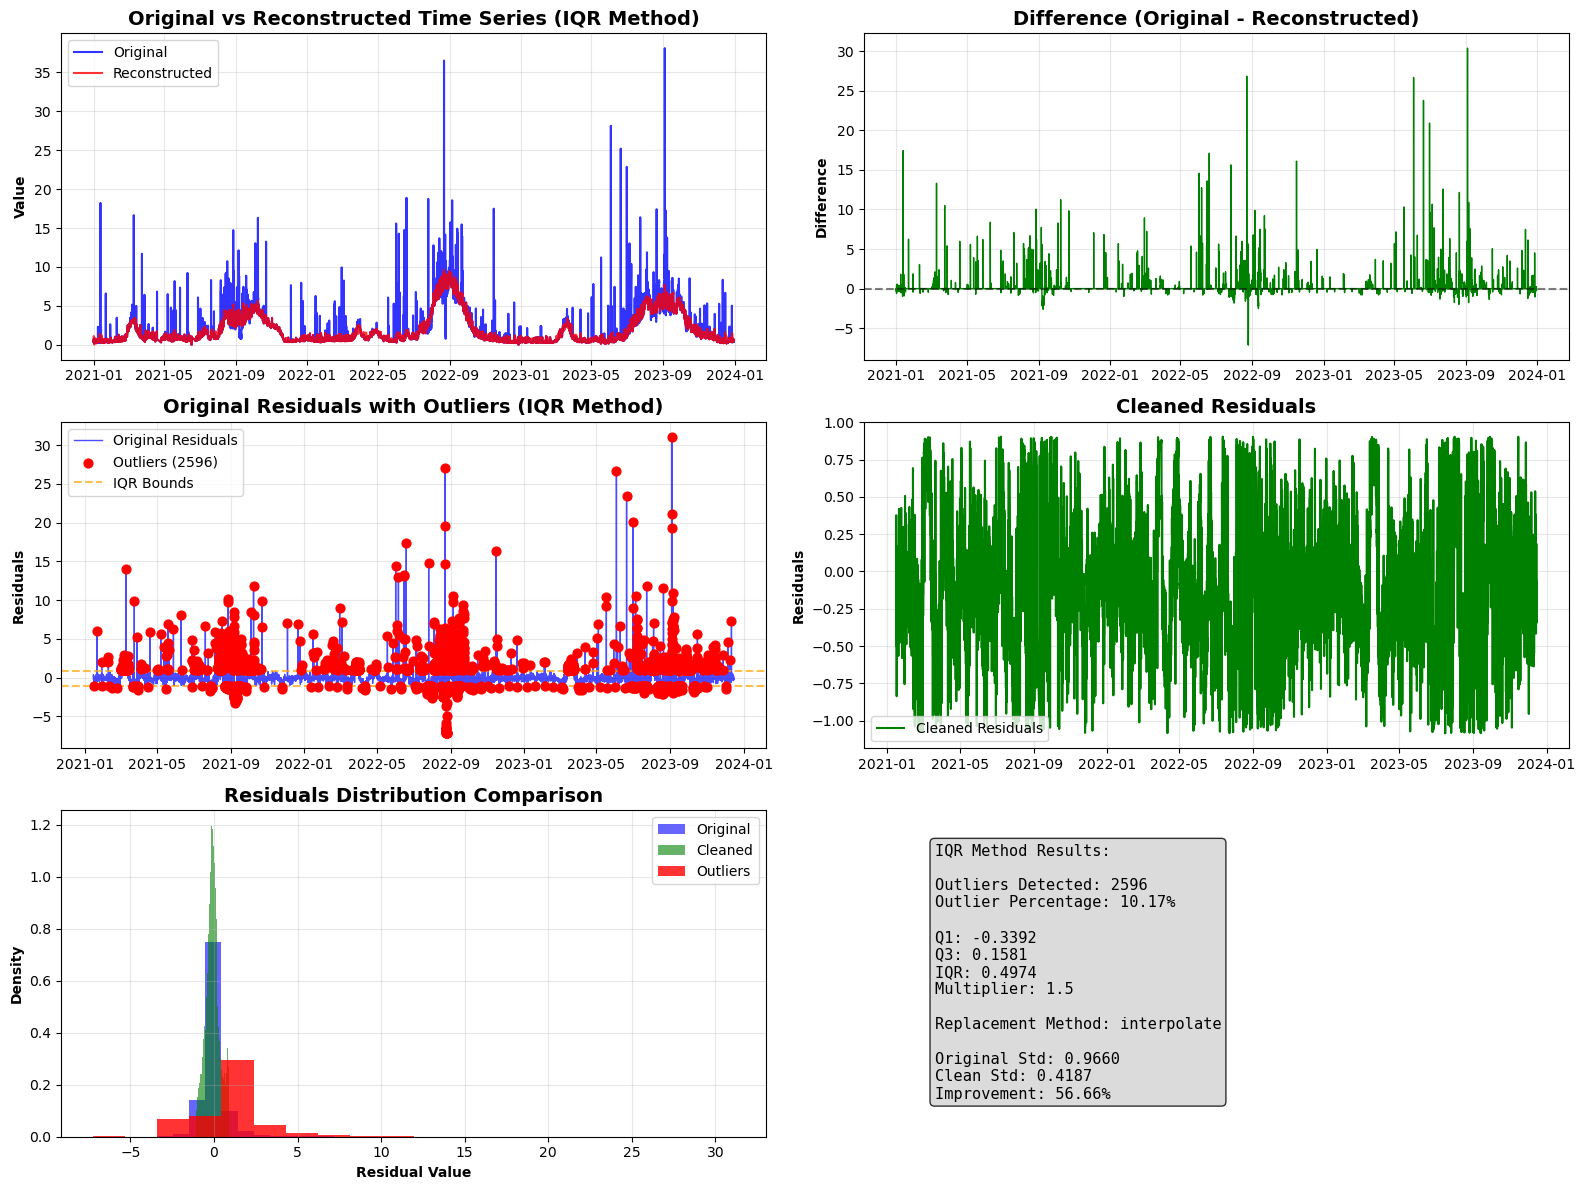

{'original_data': Date
 2020-12-31 15:00:00    0.430411
 2020-12-31 16:00:00    0.522836
 2020-12-31 17:00:00    0.512069
 2020-12-31 18:00:00    0.450545
 2020-12-31 19:00:00    0.405494
                          ...   
 2023-12-30 05:00:00    0.455236
 2023-12-30 06:00:00    0.398240
 2023-12-30 07:00:00    0.413984
 2023-12-30 08:00:00    0.435343
 2023-12-30 09:00:00    0.379473
 Freq: h, Name: FLT GEM Turb influent oneven, Length: 26251, dtype: float64,
 'reconstructed_data': Date
 2020-12-31 15:00:00    0.515238
 2020-12-31 16:00:00    0.483693
 2020-12-31 17:00:00    0.507240
 2020-12-31 18:00:00    0.526472
 2020-12-31 19:00:00    0.580485
                          ...   
 2023-12-30 05:00:00    0.540938
 2023-12-30 06:00:00    0.536344
 2023-12-30 07:00:00    0.525177
 2023-12-30 08:00:00    0.522912
 2023-12-30 09:00:00    0.533814
 Freq: h, Length: 26251, dtype: float64,
 'outlier_results': {'cleaned_residuals': Date
  2021-01-15 15:00:00    0.098820
  2021-01-15 16:00:00   

In [39]:
clean_and_reconstruct_iqr(decomposition_oneven, multiplier=1.5, replacement_method='interpolate')

=== Z-Score Method Outlier Removal and Reconstruction ===
Outliers detected: 300 (1.18%)
Z-score threshold: 3
Replacement method: interpolate


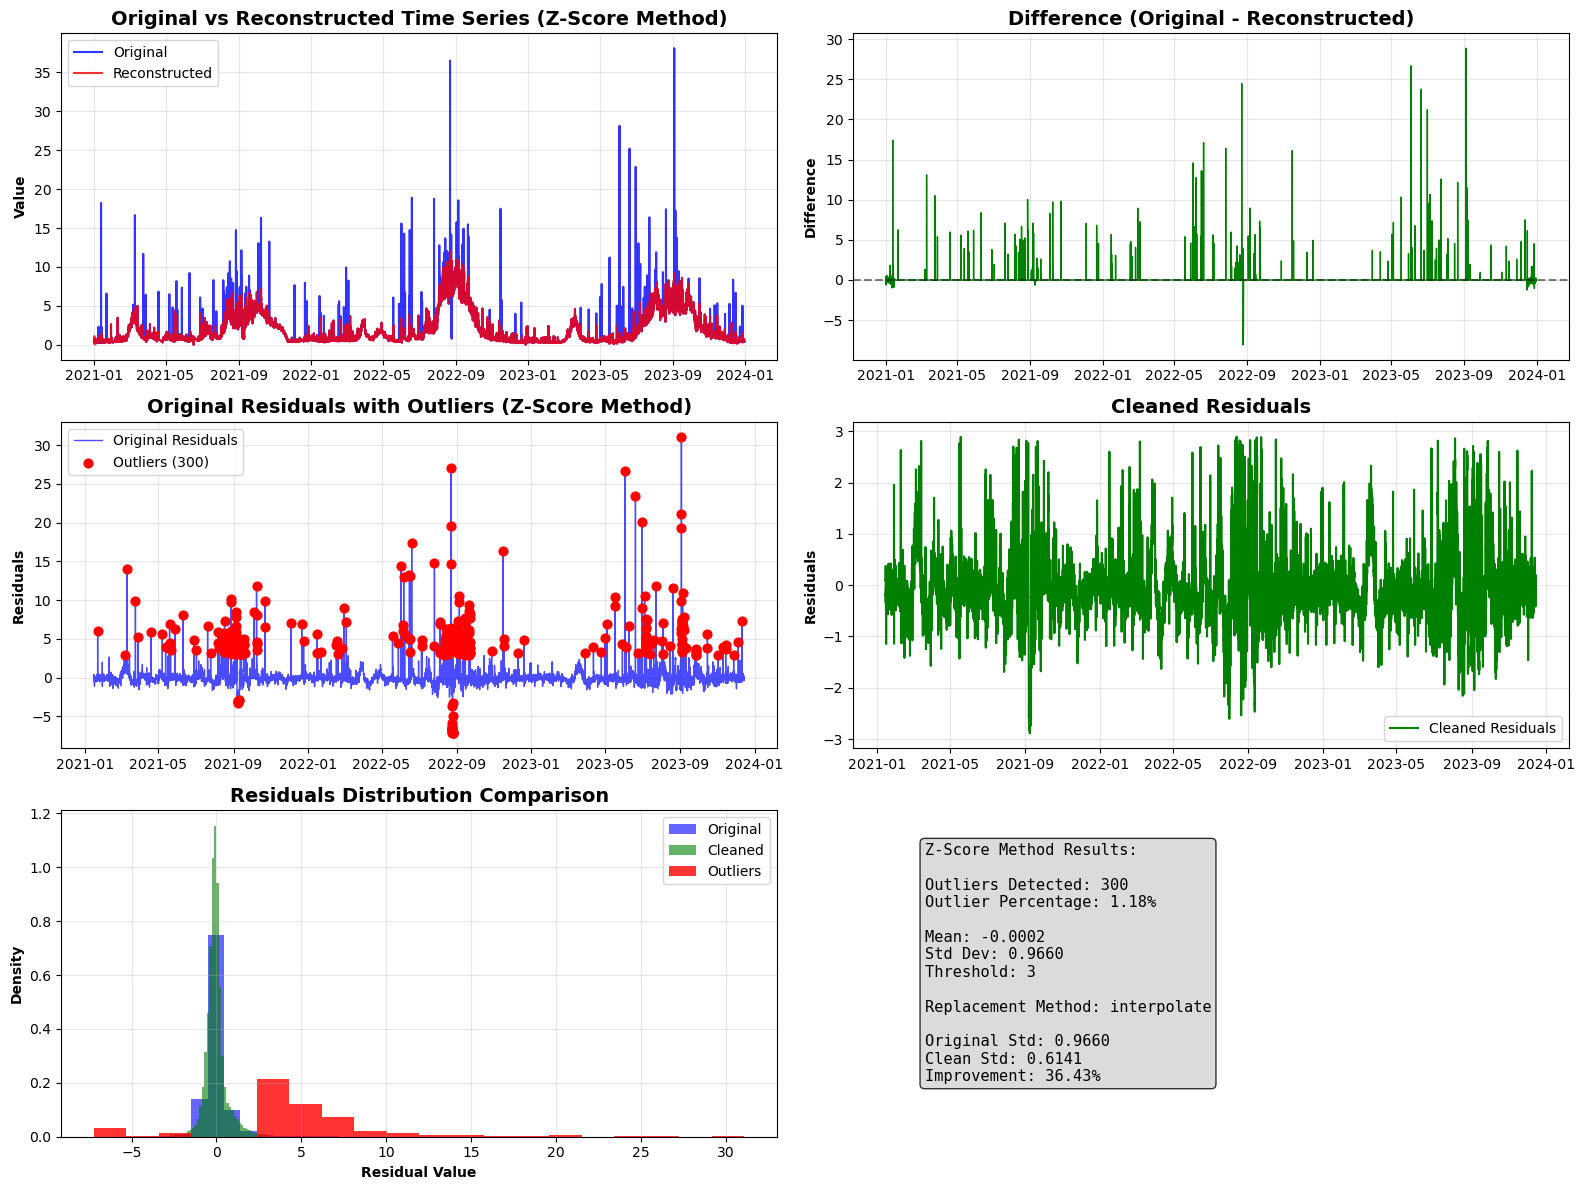

{'original_data': Date
 2020-12-31 15:00:00    0.430411
 2020-12-31 16:00:00    0.522836
 2020-12-31 17:00:00    0.512069
 2020-12-31 18:00:00    0.450545
 2020-12-31 19:00:00    0.405494
                          ...   
 2023-12-30 05:00:00    0.455236
 2023-12-30 06:00:00    0.398240
 2023-12-30 07:00:00    0.413984
 2023-12-30 08:00:00    0.435343
 2023-12-30 09:00:00    0.379473
 Freq: h, Name: FLT GEM Turb influent oneven, Length: 26251, dtype: float64,
 'reconstructed_data': Date
 2020-12-31 15:00:00    0.515238
 2020-12-31 16:00:00    0.483693
 2020-12-31 17:00:00    0.507240
 2020-12-31 18:00:00    0.526472
 2020-12-31 19:00:00    0.580485
                          ...   
 2023-12-30 05:00:00    0.540938
 2023-12-30 06:00:00    0.536344
 2023-12-30 07:00:00    0.525177
 2023-12-30 08:00:00    0.522912
 2023-12-30 09:00:00    0.533814
 Freq: h, Length: 26251, dtype: float64,
 'outlier_results': {'cleaned_residuals': Date
  2021-01-15 15:00:00    0.098820
  2021-01-15 16:00:00   

In [40]:
clean_and_reconstruct_zscore(decomposition_oneven, threshold=3, replacement_method='interpolate')

In [41]:
compare_methods(decomposition_oneven, iqr_multiplier=1.5, zscore_threshold=3, replacement_method='interpolate')

=== Comparing IQR and Z-Score Methods ===
=== IQR Method Outlier Removal and Reconstruction ===
Outliers detected: 2596 (10.17%)
IQR bounds: [-1.0853, 0.9042]
Replacement method: interpolate
=== Z-Score Method Outlier Removal and Reconstruction ===
Outliers detected: 300 (1.18%)
Z-score threshold: 3
Replacement method: interpolate

Comparison Results:
IQR Method (1.5×IQR): 2596 outliers
Z-Score Method (threshold=3): 300 outliers
Common outliers: 300
IQR only: 2296
Z-Score only: 0


{'iqr_results': {'original_data': Date
  2020-12-31 15:00:00    0.430411
  2020-12-31 16:00:00    0.522836
  2020-12-31 17:00:00    0.512069
  2020-12-31 18:00:00    0.450545
  2020-12-31 19:00:00    0.405494
                           ...   
  2023-12-30 05:00:00    0.455236
  2023-12-30 06:00:00    0.398240
  2023-12-30 07:00:00    0.413984
  2023-12-30 08:00:00    0.435343
  2023-12-30 09:00:00    0.379473
  Freq: h, Name: FLT GEM Turb influent oneven, Length: 26251, dtype: float64,
  'reconstructed_data': Date
  2020-12-31 15:00:00    0.515238
  2020-12-31 16:00:00    0.483693
  2020-12-31 17:00:00    0.507240
  2020-12-31 18:00:00    0.526472
  2020-12-31 19:00:00    0.580485
                           ...   
  2023-12-30 05:00:00    0.540938
  2023-12-30 06:00:00    0.536344
  2023-12-30 07:00:00    0.525177
  2023-12-30 08:00:00    0.522912
  2023-12-30 09:00:00    0.533814
  Freq: h, Length: 26251, dtype: float64,
  'outlier_results': {'cleaned_residuals': Date
   2021-01-15 15

=== IQR Method Outlier Removal and Reconstruction ===
Outliers detected: 2596 (10.17%)
IQR bounds: [-1.0853, 0.9042]
Replacement method: interpolate


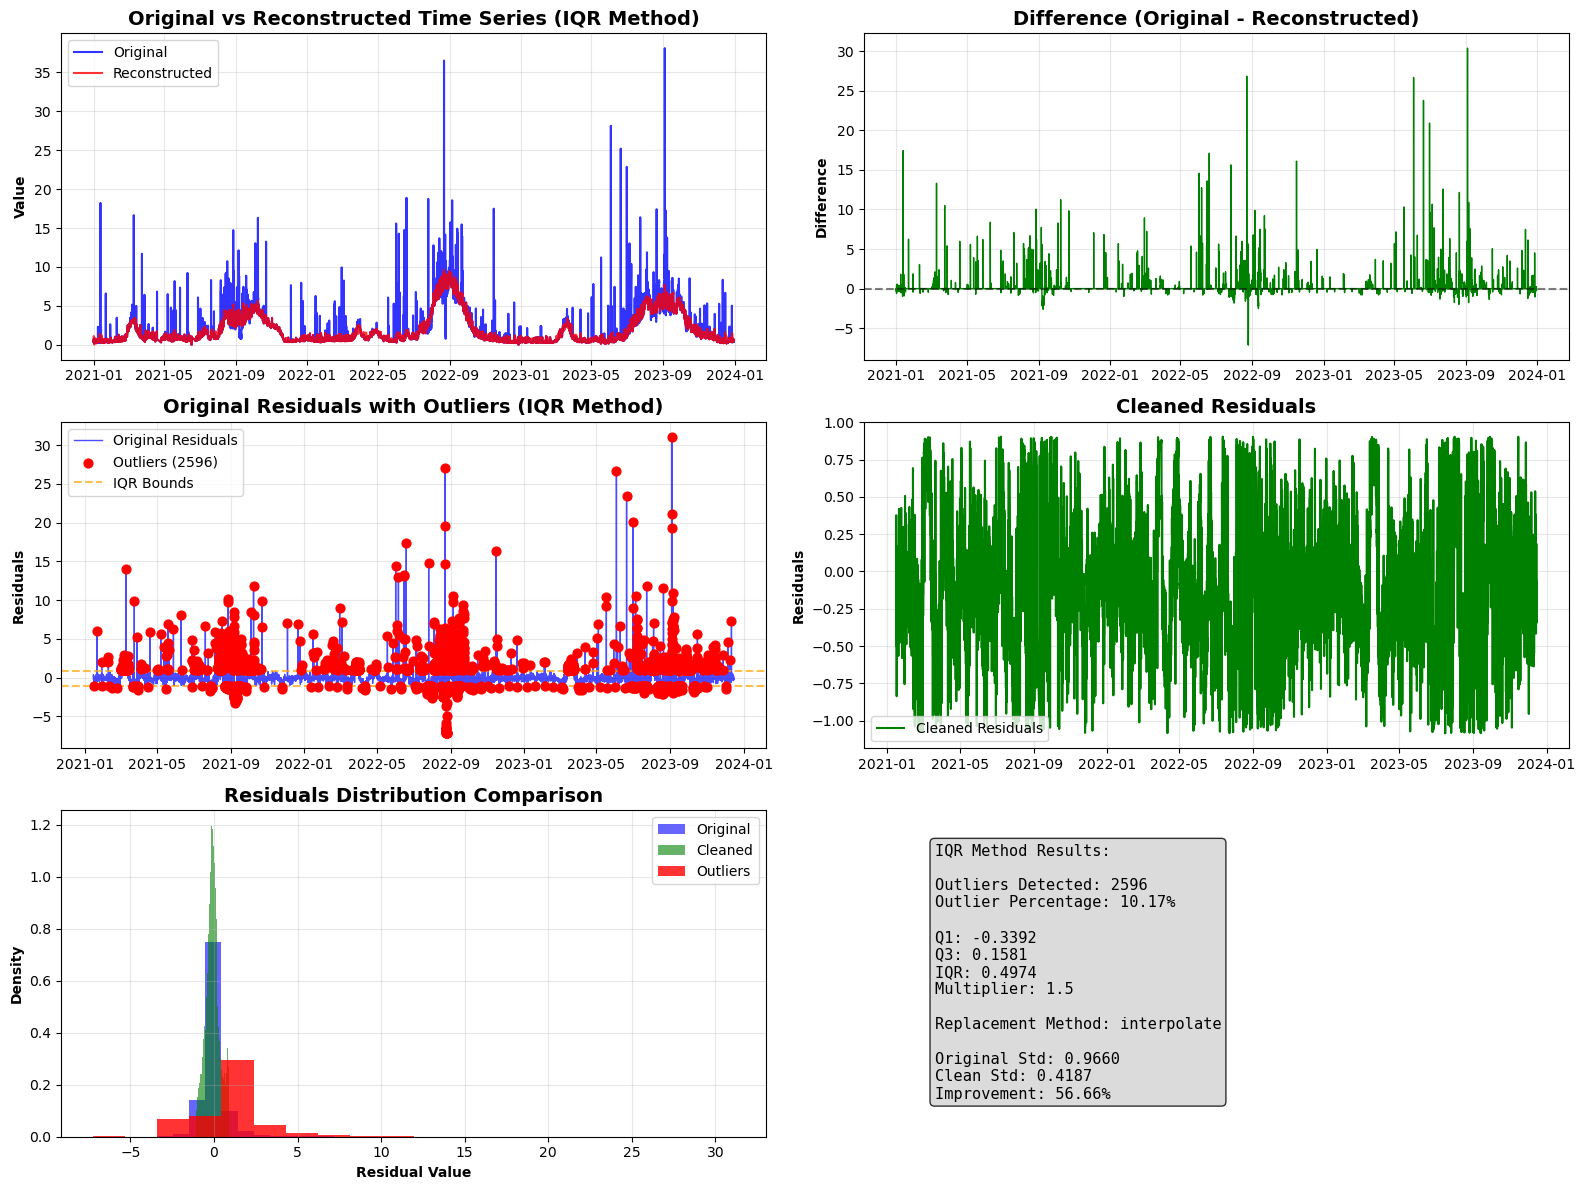

=== Z-Score Method Outlier Removal and Reconstruction ===
Outliers detected: 300 (1.18%)
Z-score threshold: 3
Replacement method: interpolate


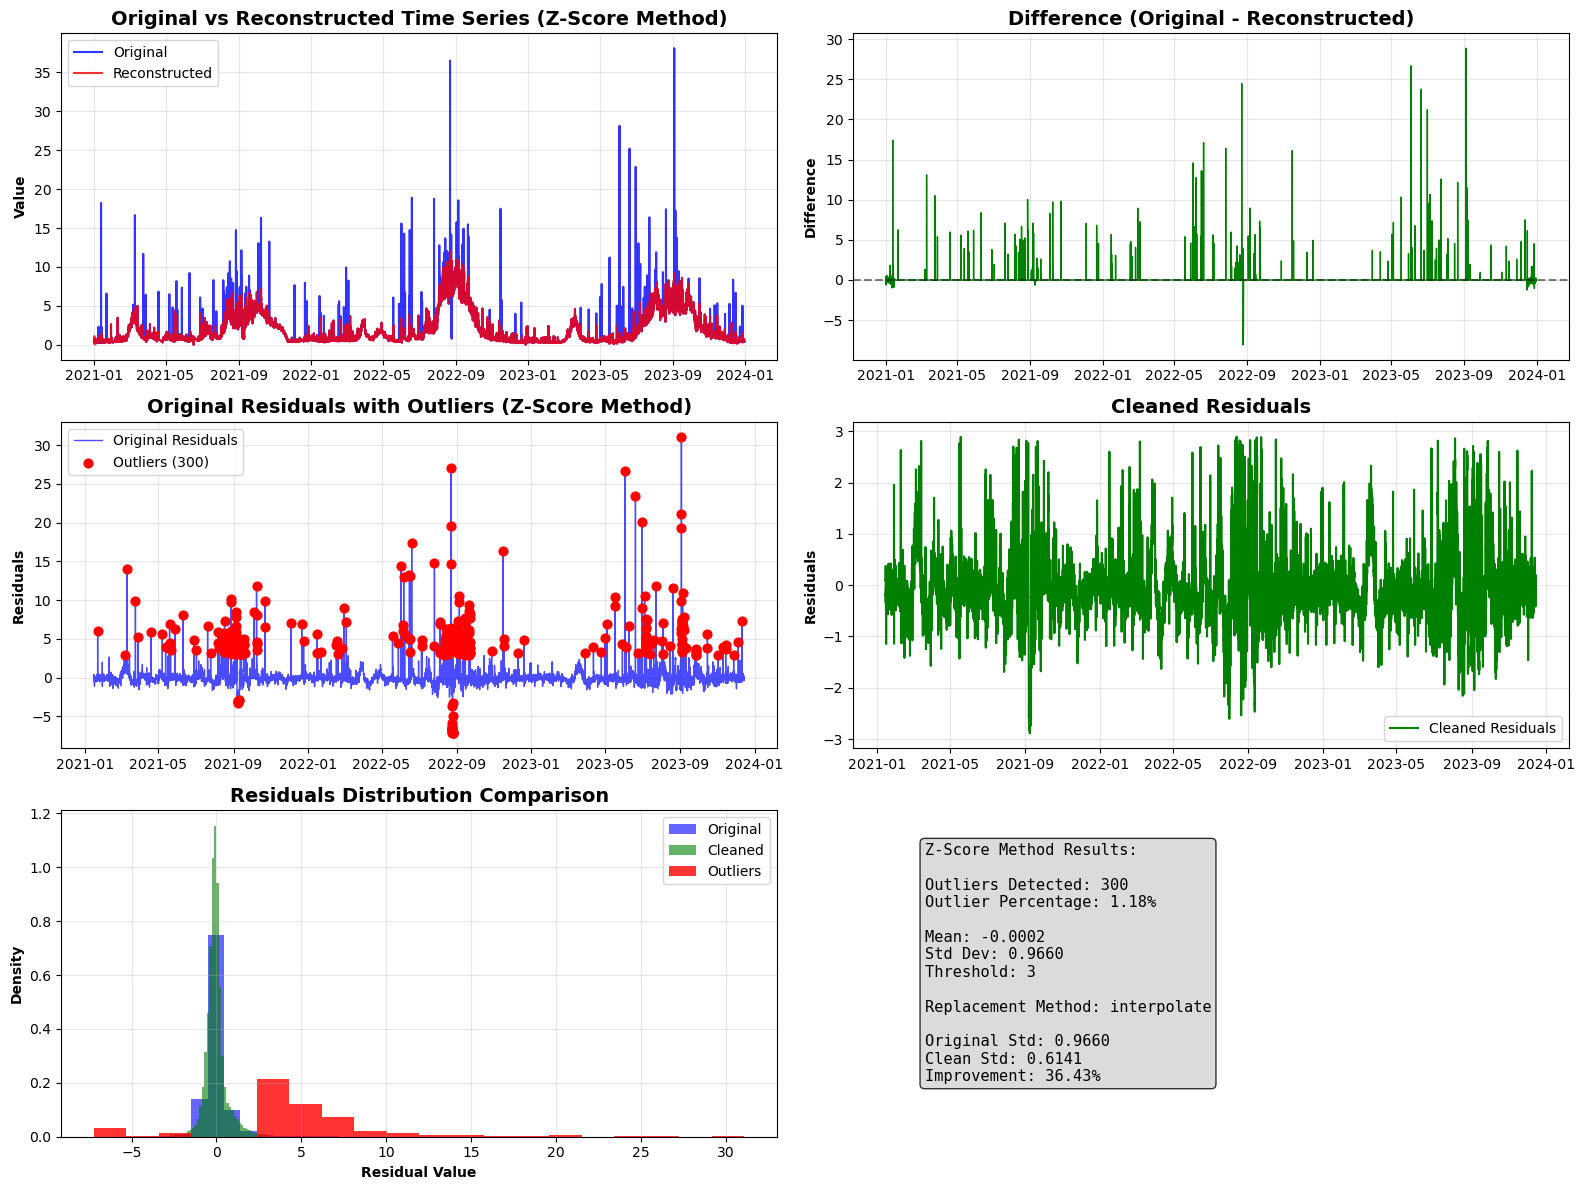

=== Comparing IQR and Z-Score Methods ===
=== IQR Method Outlier Removal and Reconstruction ===
Outliers detected: 2596 (10.17%)
IQR bounds: [-1.0853, 0.9042]
Replacement method: interpolate
=== Z-Score Method Outlier Removal and Reconstruction ===
Outliers detected: 300 (1.18%)
Z-score threshold: 3
Replacement method: interpolate

Comparison Results:
IQR Method (1.5×IQR): 2596 outliers
Z-Score Method (threshold=3): 300 outliers
Common outliers: 300
IQR only: 2296
Z-Score only: 0


In [42]:
# Example 1: Using IQR method
iqr_results = clean_and_reconstruct_iqr(
    decomposition_oneven, 
    multiplier=1.5, 
    replacement_method='interpolate'
)
cleaned_data_iqr = iqr_results['reconstructed_data']

# Example 2: Using Z-score method
zscore_results = clean_and_reconstruct_zscore(
    decomposition_oneven, 
    threshold=3, 
    replacement_method='interpolate'
)
cleaned_data_zscore = zscore_results['reconstructed_data']

# Example 3: Compare both methods
comparison = compare_methods(decomposition_oneven)


In [43]:
# save the z-score cleaned data to a CSV file and rename the column 0 as 'Turbidity (NTU)'
cleaned_data_zscore = cleaned_data_zscore.rename('Turbidity (NTU)')
cleaned_data_zscore.to_csv('cleaned_turbidity_zscore.csv', index=True)
cleaned_data_zscore.to_excel('cleaned_turbidity_zscore.xlsx', index=True)
# save the IQR cleaned data to a CSV file and rename the column 0 as 'Turbidity (NTU)'
cleaned_data_iqr = cleaned_data_iqr.rename('Turbidity (NTU)')
cleaned_data_iqr.to_csv('cleaned_turbidity_iqr.csv', index=True)

=== IQR Method Outlier Removal and Reconstruction ===
Outliers detected: 2596 (10.17%)
IQR bounds: [-1.0853, 0.9042]
Replacement method: interpolate


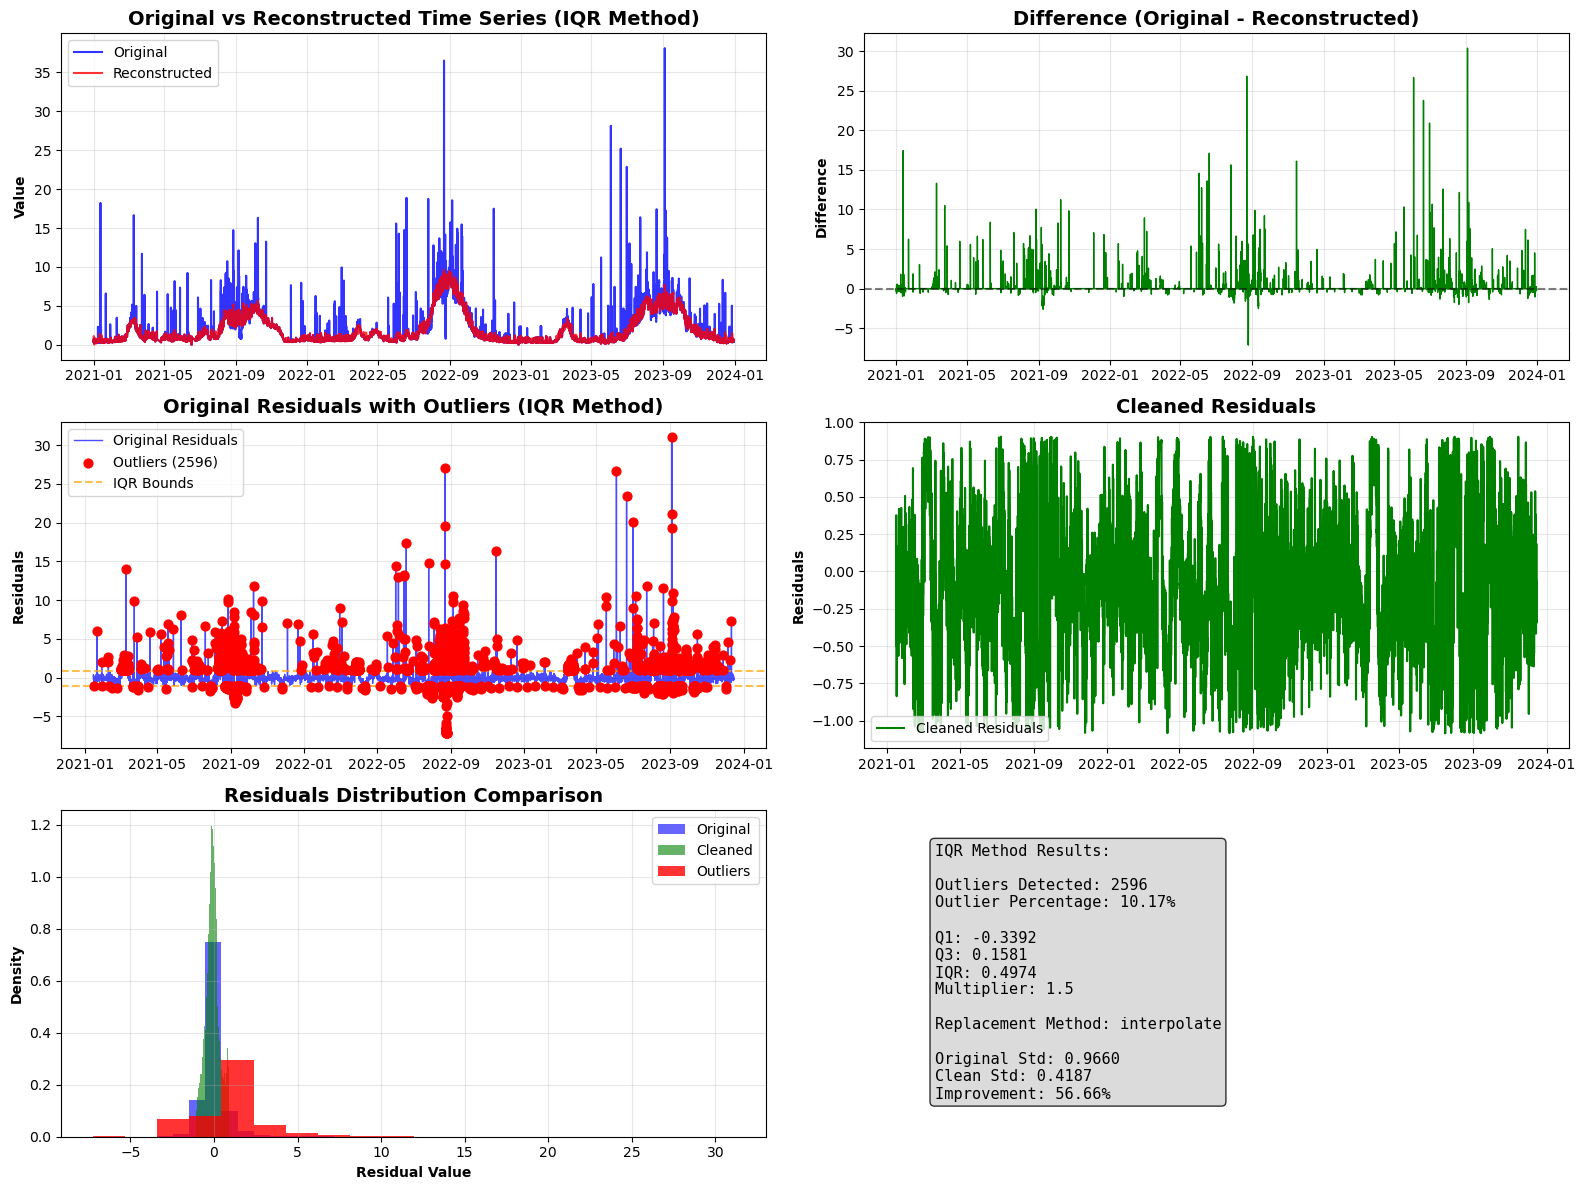

"\n# Example 1: Full analysis with automatic plotting\niqr_results = clean_and_reconstruct_iqr(decomposition_oneven, plot=True)\n\n# Example 2: Custom simple comparison\niqr_results = clean_and_reconstruct_iqr(decomposition_oneven, plot=False)\nplot_simple_comparison(iqr_results)\n\n# Example 3: Side-by-side comparison\nplot_side_by_side(iqr_results)\n\n# Example 4: Detailed analysis\nplot_detailed_comparison(iqr_results)\n\n# Example 5: Quick plot\nquick_plot(iqr_results)\n\n# Example 6: Access the cleaned data for further analysis\noriginal_data = iqr_results['original_data']\nreconstructed_data = iqr_results['reconstructed_data']\ncleaned_residuals = iqr_results['outlier_results']['cleaned_residuals']\n"

In [44]:
# Method 1: Using the built-in plotting function (automatically plots)
# This will create the comprehensive 6-subplot visualization
iqr_results = clean_and_reconstruct_iqr(
    decomposition_oneven, 
    multiplier=1.5, 
    replacement_method='interpolate',
    plot=True  # This creates the full visualization automatically
)

# Method 2: Create a simple comparison plot manually
def plot_simple_comparison(iqr_results, figsize=(14, 6)):
    """
    Simple plot showing only original vs reconstructed data
    """
    original_data = iqr_results['original_data']
    reconstructed_data = iqr_results['reconstructed_data']
    
    fig, ax = plt.subplots(figsize=figsize)
    
    # Plot both series
    ax.plot(original_data.index, original_data, 
           label='Original Data', color='blue', alpha=0.8, linewidth=1.5)
    ax.plot(reconstructed_data.index, reconstructed_data, 
           label='Reconstructed Data (IQR)', color='red', alpha=0.8, linewidth=1.5)
    
    # Customize plot
    ax.set_title('Original vs Reconstructed Time Series (IQR Method)', 
                fontsize=14, fontweight='bold')
    ax.set_xlabel('Date', fontweight='bold')
    ax.set_ylabel('Turbidity (NTU)', fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Method 3: Create side-by-side subplots
def plot_side_by_side(iqr_results, figsize=(16, 6)):
    """
    Side-by-side comparison of original and reconstructed data
    """
    original_data = iqr_results['original_data']
    reconstructed_data = iqr_results['reconstructed_data']
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    
    # Original data
    ax1.plot(original_data.index, original_data, color='blue', linewidth=1.5)
    ax1.set_title('Original Time Series', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Date', fontweight='bold')
    ax1.set_ylabel('Turbidity (NTU)', fontweight='bold')
    ax1.grid(True, alpha=0.3)
    
    # Reconstructed data
    ax2.plot(reconstructed_data.index, reconstructed_data, color='red', linewidth=1.5)
    ax2.set_title('Reconstructed Time Series (IQR)', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Date', fontweight='bold')
    ax2.set_ylabel('Turbidity (NTU)', fontweight='bold')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Method 4: Create a focused comparison with difference plot
def plot_detailed_comparison(iqr_results, figsize=(14, 10)):
    """
    Detailed comparison with difference plot and statistics
    """
    original_data = iqr_results['original_data']
    reconstructed_data = iqr_results['reconstructed_data']
    outlier_results = iqr_results['outlier_results']
    
    fig, axes = plt.subplots(3, 1, figsize=figsize)
    
    # 1. Original vs Reconstructed
    axes[0].plot(original_data.index, original_data, 
                label='Original', color='blue', alpha=0.8, linewidth=1.5)
    axes[0].plot(reconstructed_data.index, reconstructed_data, 
                label='Reconstructed (IQR)', color='red', alpha=0.8, linewidth=1.5)
    axes[0].set_title('Original vs Reconstructed Time Series', fontsize=14, fontweight='bold')
    axes[0].set_ylabel('Turbidity (NTU)', fontweight='bold')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # 2. Difference plot
    difference = original_data - reconstructed_data
    axes[1].plot(difference.index, difference, color='green', linewidth=1.5)
    axes[1].axhline(y=0, color='black', linestyle='--', alpha=0.5)
    axes[1].set_title('Difference (Original - Reconstructed)', fontsize=14, fontweight='bold')
    axes[1].set_ylabel('Difference', fontweight='bold')
    axes[1].grid(True, alpha=0.3)
    
    # 3. Residuals comparison
    original_residuals = outlier_results['original_residuals']
    cleaned_residuals = outlier_results['cleaned_residuals']
    outliers = outlier_results['outliers']
    
    axes[2].plot(original_residuals.index, original_residuals, 
                color='blue', alpha=0.7, linewidth=1, label='Original Residuals')
    axes[2].plot(cleaned_residuals.index, cleaned_residuals, 
                color='green', linewidth=1.5, label='Cleaned Residuals')
    
    if len(outliers) > 0:
        axes[2].scatter(outliers.index, outliers, color='red', 
                       s=40, label=f'Outliers ({len(outliers)})', zorder=5)
    
    # Add IQR bounds
    lower_bound, upper_bound = outlier_results['bounds']
    axes[2].axhline(y=lower_bound, color='orange', linestyle='--', alpha=0.7, label='IQR Bounds')
    axes[2].axhline(y=upper_bound, color='orange', linestyle='--', alpha=0.7)
    
    axes[2].set_title('Residuals: Original vs Cleaned', fontsize=14, fontweight='bold')
    axes[2].set_xlabel('Date', fontweight='bold')
    axes[2].set_ylabel('Residuals', fontweight='bold')
    axes[2].legend()
    axes[2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print statistics
    stats = outlier_results['statistics']
    print(f"\nIQR Method Statistics:")
    print(f"Outliers removed: {stats['outlier_count']} ({stats['outlier_percentage']:.2f}%)")
    print(f"IQR bounds: [{lower_bound:.4f}, {upper_bound:.4f}]")
    print(f"Original std: {original_residuals.std():.4f}")
    print(f"Cleaned std: {cleaned_residuals.std():.4f}")

# Method 5: Quick one-liner for simple plot
def quick_plot(iqr_results):
    """
    One-liner for quick visualization
    """
    plt.figure(figsize=(12, 6))
    plt.plot(iqr_results['original_data'], label='Original', alpha=0.8)
    plt.plot(iqr_results['reconstructed_data'], label='Reconstructed (IQR)', alpha=0.8)
    plt.title('Original vs Reconstructed Data (IQR Method)')
    plt.xlabel('Date')
    plt.ylabel('Turbidity (NTU)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# Usage Examples:
"""
# Example 1: Full analysis with automatic plotting
iqr_results = clean_and_reconstruct_iqr(decomposition_oneven, plot=True)

# Example 2: Custom simple comparison
iqr_results = clean_and_reconstruct_iqr(decomposition_oneven, plot=False)
plot_simple_comparison(iqr_results)

# Example 3: Side-by-side comparison
plot_side_by_side(iqr_results)

# Example 4: Detailed analysis
plot_detailed_comparison(iqr_results)

# Example 5: Quick plot
quick_plot(iqr_results)

# Example 6: Access the cleaned data for further analysis
original_data = iqr_results['original_data']
reconstructed_data = iqr_results['reconstructed_data']
cleaned_residuals = iqr_results['outlier_results']['cleaned_residuals']
"""

=== IQR Method Outlier Removal and Reconstruction ===
Outliers detected: 2596 (10.17%)
IQR bounds: [-1.0853, 0.9042]
Replacement method: interpolate


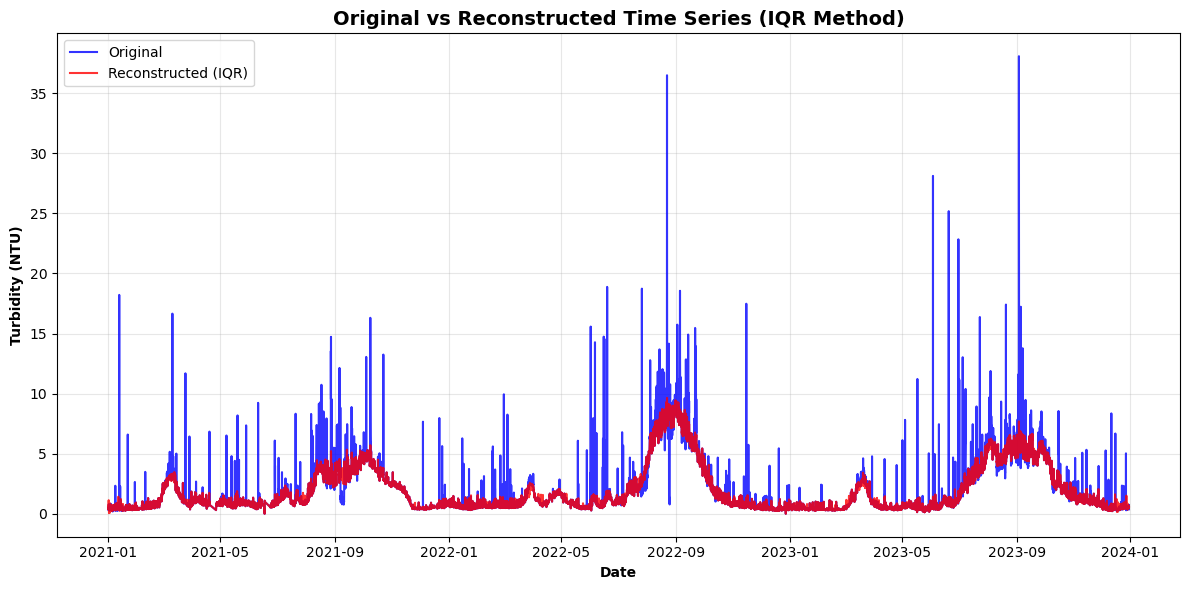

In [45]:
# Simple function to plot only original vs reconstructed data
def plot_original_vs_reconstructed_iqr(iqr_results, figsize=(12, 6)):
    """
    Plot only original vs reconstructed time series in one plot
    """
    original_data = iqr_results['original_data']
    reconstructed_data = iqr_results['reconstructed_data']
    
    plt.figure(figsize=figsize)
    
    # Plot both series
    plt.plot(original_data.index, original_data, 
             label='Original', color='blue', alpha=0.8, linewidth=1.5)
    plt.plot(reconstructed_data.index, reconstructed_data, 
             label='Reconstructed (IQR)', color='red', alpha=0.8, linewidth=1.5)
    
    # Customize plot
    plt.title('Original vs Reconstructed Time Series (IQR Method)', 
              fontsize=14, fontweight='bold')
    plt.xlabel('Date', fontweight='bold')
    plt.ylabel('Turbidity (NTU)', fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Usage:
# Step 1: Get IQR results without plotting
iqr_results = clean_and_reconstruct_iqr(
    decomposition_oneven, 
    multiplier=1.5, 
    replacement_method='interpolate',
    plot=False  # Don't show comprehensive plots
)

# Step 2: Plot only original vs reconstructed
plot_original_vs_reconstructed_iqr(iqr_results)

# Alternative one-liner approach:
def simple_iqr_plot(decomposition_oneven, multiplier=1.5, replacement_method='interpolate'):
    """
    One function to do IQR cleaning and plot only original vs reconstructed
    """
    # Get results
    iqr_results = clean_and_reconstruct_iqr(
        decomposition_oneven, 
        multiplier=multiplier, 
        replacement_method=replacement_method,
        plot=False
    )
    
    # Simple plot
    plt.figure(figsize=(12, 6))
    plt.plot(iqr_results['original_data'], label='Original', color='blue', alpha=0.8, linewidth=1.5)
    plt.plot(iqr_results['reconstructed_data'], label='Reconstructed (IQR)', color='red', alpha=0.8, linewidth=1.5)
    plt.title('Original vs Reconstructed Time Series (IQR Method)', fontsize=14, fontweight='bold')
    plt.xlabel('Date', fontweight='bold')
    plt.ylabel('Turbidity (NTU)', fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    return iqr_results

# Usage of one-liner:
# iqr_results = simple_iqr_plot(decomposition_oneven)

# Historical Mean Baseline model

In [46]:
# Split the data into training and testing sets
df = pd.read_csv('cleaned_turbidity_iqr.csv')
df.set_index('Date', inplace=True)  # Set the index to the date column
train_size = int(len(df) * 0.8)  # 80% for training
train, test = df[:train_size], df[train_size:]  # Split the data into training and testing sets

In [47]:
train

Turbidity (NTU)
Date                                
2020-12-31 15:00:00         0.515238
2020-12-31 16:00:00         0.483693
2020-12-31 17:00:00         0.507240
2020-12-31 18:00:00         0.526472
2020-12-31 19:00:00         0.580485
...                              ...
2023-05-25 10:00:00         0.229242
2023-05-25 11:00:00         0.136613
2023-05-25 12:00:00         0.228651
2023-05-25 13:00:00         0.225934
2023-05-25 14:00:00         0.267168

[21000 rows x 1 columns]

In [48]:
test

Turbidity (NTU)
Date                                
2023-05-25 15:00:00         0.413618
2023-05-25 16:00:00         0.527081
2023-05-25 17:00:00         0.518886
2023-05-25 18:00:00         0.481047
2023-05-25 19:00:00         0.452715
...                              ...
2023-12-30 05:00:00         0.540938
2023-12-30 06:00:00         0.536344
2023-12-30 07:00:00         0.525177
2023-12-30 08:00:00         0.522912
2023-12-30 09:00:00         0.533814

[5251 rows x 1 columns]

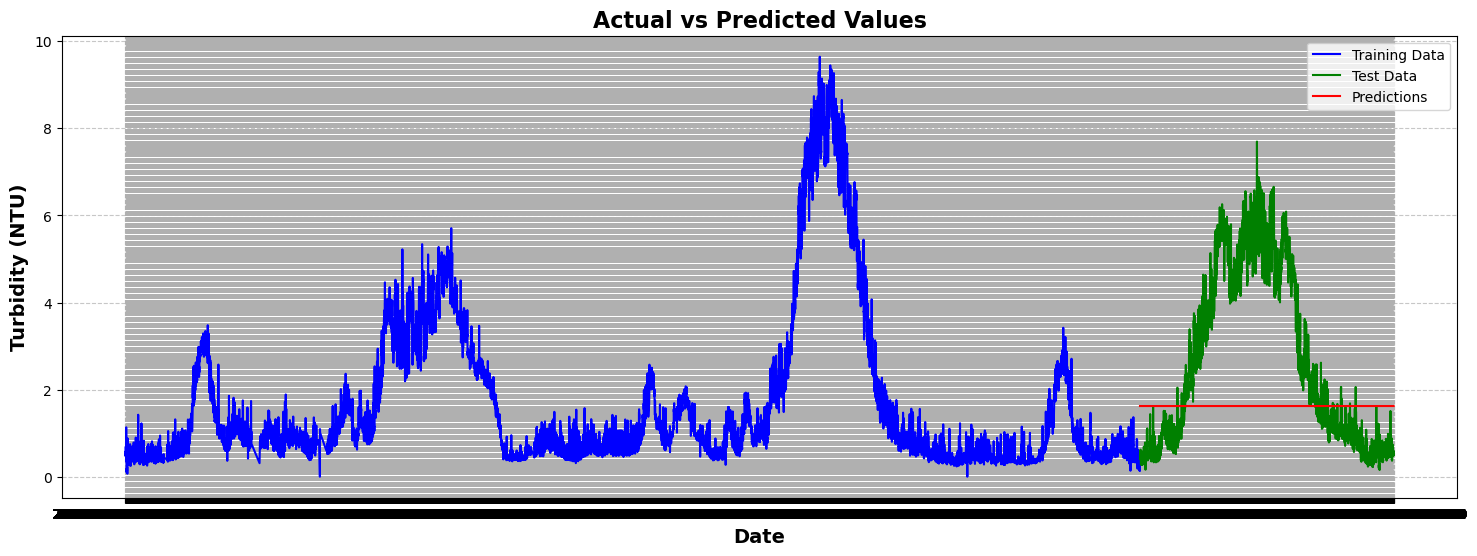

1.6234255369242427


In [49]:
# Use mean of historical train data as predicted value for test data
mean_train = train['Turbidity (NTU)'].mean()  # Calculate the mean of the training data
predictions = [mean_train] * len(test)  # Create a list of predictions with the same length as the test data
test['Predictions'] = predictions  # Add the predictions to the test data

# Plot the actual vs predicted values
plt.figure(figsize=(18, 6))
plt.plot(train.index, train['Turbidity (NTU)'], label='Training Data', color='blue')
plt.plot(test.index, test['Turbidity (NTU)'], label='Test Data', color='green')
plt.plot(test.index, test['Predictions'], label='Predictions', color='red')
plt.title('Actual vs Predicted Values', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Turbidity (NTU)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


print(mean_train)

In [64]:
# evaluate the model using RMSE, MAE, and MAPE, r2 score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error

# Calculate RMSE, MAE, MAPE, and R2 score
rmse = np.sqrt(mean_squared_error(test['Turbidity (NTU)'], test['Predictions']))
mae = mean_absolute_error(test['Turbidity (NTU)'], test['Predictions'])
mape = mean_absolute_percentage_error(test['Turbidity (NTU)'], test['Predictions']) * 100  # Convert to percentage
r2 = r2_score(test['Turbidity (NTU)'], test['Predictions'])
mse = mean_squared_error(test['Turbidity (NTU)'], test['Predictions'])
print(f'MSE: {mse:.2f}')
# Print the evaluation metrics
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'MAPE: {mape:.2f}')
print(f'R2 Score: {r2:.2f}')


MSE: 5.08
RMSE: 2.25
MAE: 1.79
MAPE: 99.88
R2 Score: -0.26


In [51]:
df.describe()  # Display the summary statistics of the dataset

Turbidity (NTU)
count     26251.000000
mean          1.828483
std           1.883473
min           0.000000
25%           0.568946
50%           0.931833
75%           2.468449
max           9.644137

In [2]:
import pandas as pd

In [3]:
weather_df = pd.read_excel('weather.xlsx')
weather_df.set_index('Date', inplace=True)  # Set the index to the date column
weather_df = weather_df.asfreq('h')  # Set frequency to hourly

In [4]:
weather_df

temperature_2m (°C)  relative_humidity_2m (%)  \
Date                                                                 
2020-12-31 15:00:00                  4.0                        79   
2020-12-31 16:00:00                  4.0                        78   
2020-12-31 17:00:00                  3.4                        85   
2020-12-31 18:00:00                  1.5                        94   
2020-12-31 19:00:00                  0.8                        95   
...                                  ...                       ...   
2023-12-30 05:00:00                  7.1                        88   
2023-12-30 06:00:00                  6.9                        90   
2023-12-30 07:00:00                  6.9                        90   
2023-12-30 08:00:00                  6.7                        91   
2023-12-30 09:00:00                  6.6                        93   

                     precipitation (mm)  soil_moisture_0_to_7cm (m³/m³)  \
Date                                                                      
2020-12-31 15:00:00                 0.0                           0.392   
2020-12-31 16:00:00                 0.0                           0.391   
2020-12-31 17:00:00                 0.0                           0.391   
2020-12-31 18:00:00                 0.0                           0.390   
2020-12-31 19:00:00                 0.0                           0.389   
...                                 ...                             ...   
2023-12-30 05:00:00                 0.1                           0.400   
2023-12-30 06:00:00                 0.0                           0.399   
2023-12-30 07:00:00                 0.0                           0.399   
2023-12-30 08:00:00                 0.0                           0.398   
2023-12-30 09:00:00                 0.0                           0.397   

                     wind_speed_10m (km/h)  direct_radiation (W/m²)  \
Date                                                                  
2020-12-31 15:00:00                   10.5                       95   
2020-12-31 16:00:00                    9.8                       55   
2020-12-31 17:00:00                    5.6                       25   
2020-12-31 18:00:00                    7.3                        3   
2020-12-31 19:00:00                    7.1                        0   
...                                    ...                      ...   
2023-12-30 05:00:00                   21.8                        0   
2023-12-30 06:00:00                   21.5                        0   
2023-12-30 07:00:00                   21.4                        0   
2023-12-30 08:00:00                   19.0                        0   
2023-12-30 09:00:00                   19.4                        0   

                     wind_direction_10m (°)  
Date                                         
2020-12-31 15:00:00                     352  
2020-12-31 16:00:00                     345  
2020-12-31 17:00:00                     327  
2020-12-31 18:00:00                     294  
2020-12-31 19:00:00                     290  
...                                     ...  
2023-12-30 05:00:00                     235  
2023-12-30 06:00:00                     234  
2023-12-30 07:00:00                     233  
2023-12-30 08:00:00                     230  
2023-12-30 09:00:00                     227  

[26251 rows x 7 columns]

In [5]:
# creat lag features
weather_df['soil_moisture_0_to_7cm (m³/m³) Lag72'] = weather_df['soil_moisture_0_to_7cm (m³/m³)'].shift(72) 
weather_df['relative_humidity_2m (%) Lag3'] = weather_df['relative_humidity_2m (%)'].shift(3)  
# weather_df['wind_direction_10m (°) Lag6'] = weather_df['wind_direction_10m (°)'].shift(6)
weather_df['wind_speed_10m(km/h) Lag6'] = weather_df['wind_speed_10m (km/h)'].shift(6)
weather_df['direct_radiation (W/m²) Lag72'] = weather_df['direct_radiation (W/m²)'].shift(72)
weather_df['precipitation (mm) Lag72'] = weather_df['precipitation (mm)'].shift(72)


In [6]:
weather_df = weather_df[
    [
        'temperature_2m (°C)', 
        'relative_humidity_2m (%)',
        # 'wind_direction_10m (°)', 
        'wind_speed_10m (km/h)', 
        'soil_moisture_0_to_7cm (m³/m³) Lag72', 
        'relative_humidity_2m (%) Lag3', 
        # 'wind_direction_10m (°) Lag6', 
        'wind_speed_10m(km/h) Lag6', 
        'direct_radiation (W/m²) Lag72',
        'precipitation (mm)',
        'precipitation (mm) Lag72'
    ]
]

In [7]:
weather_df = weather_df.dropna()  # Drop rows with NaN values after creating lag features
weather_df

temperature_2m (°C)  relative_humidity_2m (%)  \
Date                                                                 
2021-01-03 15:00:00                  3.7                        78   
2021-01-03 16:00:00                  3.6                        80   
2021-01-03 17:00:00                  3.5                        78   
2021-01-03 18:00:00                  3.0                        77   
2021-01-03 19:00:00                  2.7                        81   
...                                  ...                       ...   
2023-12-30 05:00:00                  7.1                        88   
2023-12-30 06:00:00                  6.9                        90   
2023-12-30 07:00:00                  6.9                        90   
2023-12-30 08:00:00                  6.7                        91   
2023-12-30 09:00:00                  6.6                        93   

                     wind_speed_10m (km/h)  \
Date                                         
2021-01-03 15:00:00                   19.9   
2021-01-03 16:00:00                   17.2   
2021-01-03 17:00:00                   16.1   
2021-01-03 18:00:00                   14.5   
2021-01-03 19:00:00                   14.9   
...                                    ...   
2023-12-30 05:00:00                   21.8   
2023-12-30 06:00:00                   21.5   
2023-12-30 07:00:00                   21.4   
2023-12-30 08:00:00                   19.0   
2023-12-30 09:00:00                   19.4   

                     soil_moisture_0_to_7cm (m³/m³) Lag72  \
Date                                                        
2021-01-03 15:00:00                                 0.392   
2021-01-03 16:00:00                                 0.391   
2021-01-03 17:00:00                                 0.391   
2021-01-03 18:00:00                                 0.390   
2021-01-03 19:00:00                                 0.389   
...                                                   ...   
2023-12-30 05:00:00                                 0.395   
2023-12-30 06:00:00                                 0.397   
2023-12-30 07:00:00                                 0.404   
2023-12-30 08:00:00                                 0.408   
2023-12-30 09:00:00                                 0.409   

                     relative_humidity_2m (%) Lag3  wind_speed_10m(km/h) Lag6  \
Date                                                                            
2021-01-03 15:00:00                           89.0                        6.5   
2021-01-03 16:00:00                           85.0                        9.1   
2021-01-03 17:00:00                           80.0                       11.5   
2021-01-03 18:00:00                           78.0                       13.6   
2021-01-03 19:00:00                           80.0                       15.3   
...                                            ...                        ...   
2023-12-30 05:00:00                           88.0                       24.8   
2023-12-30 06:00:00                           87.0                       23.8   
2023-12-30 07:00:00                           88.0                       21.1   
2023-12-30 08:00:00                           88.0                       21.6   
2023-12-30 09:00:00                           90.0                       22.9   

                     direct_radiation (W/m²) Lag72  precipitation (mm)  \
Date                                                                     
2021-01-03 15:00:00                           95.0                 0.0   
2021-01-03 16:00:00                           55.0                 0.0   
2021-01-03 17:00:00                           25.0                 0.0   
2021-01-03 18:00:00                            3.0                 0.0   
2021-01-03 19:00:00                            0.0                 0.0   
...                                            ...                 ...   
2023-12-30 05:00:00                            0.0                 0.1 

In [58]:
# merge the weather data with the cleaned turbidity data
turbidity_zscore = pd.read_csv('cleaned_turbidity_zscore.csv', index_col='Date', parse_dates=True)
merged_df = pd.merge(turbidity_zscore, weather_df, left_index=True, right_index=True, how='inner')  # Merge on the index (date)

In [8]:
turbidity_iqr = pd.read_csv('cleaned_turbidity_iqr.csv', index_col='Date', parse_dates=True)
merged_df_iqr = pd.merge(turbidity_iqr, weather_df, left_index=True, right_index=True, how='inner')  # Merge on the index (date)
merged_df_iqr = merged_df_iqr.dropna()  # Drop rows with NaN values after merging
merged_df_iqr


Turbidity (NTU)  temperature_2m (°C)  \
Date                                                        
2021-01-03 15:00:00         0.419150                  3.7   
2021-01-03 16:00:00         0.422334                  3.6   
2021-01-03 17:00:00         0.402026                  3.5   
2021-01-03 18:00:00         0.400664                  3.0   
2021-01-03 19:00:00         0.399815                  2.7   
...                              ...                  ...   
2023-12-30 05:00:00         0.540938                  7.1   
2023-12-30 06:00:00         0.536344                  6.9   
2023-12-30 07:00:00         0.525177                  6.9   
2023-12-30 08:00:00         0.522912                  6.7   
2023-12-30 09:00:00         0.533814                  6.6   

                     relative_humidity_2m (%)  wind_speed_10m (km/h)  \
Date                                                                   
2021-01-03 15:00:00                        78                   19.9   
2021-01-03 16:00:00                        80                   17.2   
2021-01-03 17:00:00                        78                   16.1   
2021-01-03 18:00:00                        77                   14.5   
2021-01-03 19:00:00                        81                   14.9   
...                                       ...                    ...   
2023-12-30 05:00:00                        88                   21.8   
2023-12-30 06:00:00                        90                   21.5   
2023-12-30 07:00:00                        90                   21.4   
2023-12-30 08:00:00                        91                   19.0   
2023-12-30 09:00:00                        93                   19.4   

                     soil_moisture_0_to_7cm (m³/m³) Lag72  \
Date                                                        
2021-01-03 15:00:00                                 0.392   
2021-01-03 16:00:00                                 0.391   
2021-01-03 17:00:00                                 0.391   
2021-01-03 18:00:00                                 0.390   
2021-01-03 19:00:00                                 0.389   
...                                                   ...   
2023-12-30 05:00:00                                 0.395   
2023-12-30 06:00:00                                 0.397   
2023-12-30 07:00:00                                 0.404   
2023-12-30 08:00:00                                 0.408   
2023-12-30 09:00:00                                 0.409   

                     relative_humidity_2m (%) Lag3  wind_speed_10m(km/h) Lag6  \
Date                                                                            
2021-01-03 15:00:00                           89.0                        6.5   
2021-01-03 16:00:00                           85.0                        9.1   
2021-01-03 17:00:00                           80.0                       11.5   
2021-01-03 18:00:00                           78.0                       13.6   
2021-01-03 19:00:00                           80.0                       15.3   
...                                            ...                        ...   
2023-12-30 05:00:00                           88.0                       24.8   
2023-12-30 06:00:00                           87.0                       23.8   
2023-12-30 07:00:00                           88.0                       21.1   
2023-12-30 08:00:00                           88.0                       21.6   
2023-12-30 09:00:00                           90.0                       22.9   

                     direct_radiation (W/m²) Lag72  precipitation (mm)  \
Date                                                                     
2021-01-03 15:00:00                           95.0                 0.0   
2021-01-03 16:00:00                           55.0                 0.0   
2021-01-03 17:00:00                           25.0                 0.0   
2021-01-03 18:00:00                            3.0                 0.0  

In [9]:
# save the merged data to a CSV file
merged_df_iqr.to_csv('merged_turbidity_weather_iqr_2.csv')
merged_df_iqr.to_excel('merged_turbidity_weather_iqr_2.xlsx')

In [10]:
merged_df_iqr = merged_df_iqr.dropna()  # Drop rows with NaN values after merging
# Display the merged dataframe after dropping NaN values
merged_df_iqr

Turbidity (NTU)  temperature_2m (°C)  \
Date                                                        
2021-01-03 15:00:00         0.419150                  3.7   
2021-01-03 16:00:00         0.422334                  3.6   
2021-01-03 17:00:00         0.402026                  3.5   
2021-01-03 18:00:00         0.400664                  3.0   
2021-01-03 19:00:00         0.399815                  2.7   
...                              ...                  ...   
2023-12-30 05:00:00         0.540938                  7.1   
2023-12-30 06:00:00         0.536344                  6.9   
2023-12-30 07:00:00         0.525177                  6.9   
2023-12-30 08:00:00         0.522912                  6.7   
2023-12-30 09:00:00         0.533814                  6.6   

                     relative_humidity_2m (%)  wind_speed_10m (km/h)  \
Date                                                                   
2021-01-03 15:00:00                        78                   19.9   
2021-01-03 16:00:00                        80                   17.2   
2021-01-03 17:00:00                        78                   16.1   
2021-01-03 18:00:00                        77                   14.5   
2021-01-03 19:00:00                        81                   14.9   
...                                       ...                    ...   
2023-12-30 05:00:00                        88                   21.8   
2023-12-30 06:00:00                        90                   21.5   
2023-12-30 07:00:00                        90                   21.4   
2023-12-30 08:00:00                        91                   19.0   
2023-12-30 09:00:00                        93                   19.4   

                     soil_moisture_0_to_7cm (m³/m³) Lag72  \
Date                                                        
2021-01-03 15:00:00                                 0.392   
2021-01-03 16:00:00                                 0.391   
2021-01-03 17:00:00                                 0.391   
2021-01-03 18:00:00                                 0.390   
2021-01-03 19:00:00                                 0.389   
...                                                   ...   
2023-12-30 05:00:00                                 0.395   
2023-12-30 06:00:00                                 0.397   
2023-12-30 07:00:00                                 0.404   
2023-12-30 08:00:00                                 0.408   
2023-12-30 09:00:00                                 0.409   

                     relative_humidity_2m (%) Lag3  wind_speed_10m(km/h) Lag6  \
Date                                                                            
2021-01-03 15:00:00                           89.0                        6.5   
2021-01-03 16:00:00                           85.0                        9.1   
2021-01-03 17:00:00                           80.0                       11.5   
2021-01-03 18:00:00                           78.0                       13.6   
2021-01-03 19:00:00                           80.0                       15.3   
...                                            ...                        ...   
2023-12-30 05:00:00                           88.0                       24.8   
2023-12-30 06:00:00                           87.0                       23.8   
2023-12-30 07:00:00                           88.0                       21.1   
2023-12-30 08:00:00                           88.0                       21.6   
2023-12-30 09:00:00                           90.0                       22.9   

                     direct_radiation (W/m²) Lag72  precipitation (mm)  \
Date                                                                     
2021-01-03 15:00:00                           95.0                 0.0   
2021-01-03 16:00:00                           55.0                 0.0   
2021-01-03 17:00:00                           25.0                 0.0   
2021-01-03 18:00:00                            3.0                 0.0  